# <a id='toc1_'></a>[Sentiment Analysis, Semi-Supervised Learning, and LLMs](#toc0_)

In this notebook, we are given a dataset and asked to train a model to classify IMDb review comments automatically. First, we need to use different methods to expand our labeled data for training, extract features from sentences, and then train and evaluate our model.

## <a id='toc1_1_'></a>[Authors](#toc0_)


* **Hadi Babalou**
* **Alireza Arbabi**
* **Ali Padyav**
* **Kasra HajiHeidari**

## <a id='toc1_2_'></a>[Table of Contents](#toc0_)

**Table of contents**<a id='toc0_'></a>    
- [Sentiment Analysis, Semi-Supervised Learning, and LLMs](#toc1_)    
  - [Authors](#toc1_1_)    
  - [Table of Contents](#toc1_2_)    
  - [Setting up the Environment](#toc1_3_)    
  - [Load model](#toc1_4_)    
  - [Exploratory Data Analysis](#toc1_5_)    
    - [Load Data](#toc1_5_1_)    
    - [Basic Information](#toc1_5_2_)    
    - [Preprocessing](#toc1_5_3_)    
    - [Most Common Words](#toc1_5_4_)    
    - [Feature Distribution](#toc1_5_5_)    
      - [Train](#toc1_5_5_1_)    
      - [Test](#toc1_5_5_2_)    
      - [Unlabelled](#toc1_5_5_3_)    
    - [Word Cloud](#toc1_5_6_)    
      - [Train](#toc1_5_6_1_)    
      - [Test](#toc1_5_6_2_)    
      - [Unlabelled](#toc1_5_6_3_)    
  - [Feature Engineering](#toc1_6_)    
  - [Classifier](#toc1_7_)    
    - [Random Forest](#toc1_7_1_)    
    - [Neural Network](#toc1_7_2_)    
  - [Semi-Supervised Learning](#toc1_8_)    
      - [KMeans](#toc1_8_1_1_)    
      - [KNN](#toc1_8_1_2_)    
      - [Graph-based](#toc1_8_1_3_)    
      - [Expectation-Maximization](#toc1_8_1_4_)    
      - [Self-Training with Confidence Threshold](#toc1_8_1_5_)    
        - [Random Forest](#toc1_8_1_5_1_)    
        - [SVC](#toc1_8_1_5_2_)    
      - [Saving the Results](#toc1_8_1_6_)    
    - [LLMs](#toc1_8_2_)    
  - [Training](#toc1_9_)    
    - [Data Preparation](#toc1_9_1_)    
    - [Random Forest](#toc1_9_2_)    
      - [Raw Data](#toc1_9_2_1_)    
      - [KMeans](#toc1_9_2_2_)    
      - [KNN](#toc1_9_2_3_)    
      - [Graph-based](#toc1_9_2_4_)    
      - [Self-Training with Confidence Threshold](#toc1_9_2_5_)    
        - [Random Forest](#toc1_9_2_5_1_)    
        - [SVC](#toc1_9_2_5_2_)    
      - [LLM](#toc1_9_2_6_)    
    - [Neural Network](#toc1_9_3_)    
      - [Raw Data](#toc1_9_3_1_)    
      - [KMeans](#toc1_9_3_2_)    
      - [KNN](#toc1_9_3_3_)    
      - [Graph-based](#toc1_9_3_4_)    
      - [Self-Training with Confidence Threshold](#toc1_9_3_5_)    
        - [Random Forest](#toc1_9_3_5_1_)    
        - [SVC](#toc1_9_3_5_2_)    
      - [LLM](#toc1_9_3_6_)    
  - [Evaluation](#toc1_10_)    
    - [Random Forest](#toc1_10_1_)    
      - [Raw Data](#toc1_10_1_1_)    
      - [KMeans](#toc1_10_1_2_)    
      - [KNN](#toc1_10_1_3_)    
      - [Graph-based](#toc1_10_1_4_)    
      - [Self-Training with Confidence Threshold](#toc1_10_1_5_)    
        - [Random Forest](#toc1_10_1_5_1_)    
        - [SVC](#toc1_10_1_5_2_)    
      - [LLM](#toc1_10_1_6_)    
    - [Neural Network](#toc1_10_2_)    
      - [Raw Data](#toc1_10_2_1_)    
      - [KMeans](#toc1_10_2_2_)    
      - [KNN](#toc1_10_2_3_)    
      - [Graph-based](#toc1_10_2_4_)    
      - [Self-Training with Confidence Threshold](#toc1_10_2_5_)    
        - [Random Forest](#toc1_10_2_5_1_)    
        - [SVC](#toc1_10_2_5_2_)    
      - [LLM](#toc1_10_2_6_)    
  - [Questions](#toc1_11_)    
    - [Question 1](#toc1_11_1_)    
    - [Question 2](#toc1_11_2_)    
    - [Question 3](#toc1_11_3_)    
    - [Question 4](#toc1_11_4_)    
      - [History and Evolution of Language Modeling](#toc1_11_4_1_)    
      - [How Language Models Work?](#toc1_11_4_2_)    
        - [Basic Mechanism:](#toc1_11_4_2_1_)    
        - [Advantages of Large Language Models:](#toc1_11_4_2_2_)    
        - [Disadvantages of Large Language Models:](#toc1_11_4_2_3_)    
    - [Question 5](#toc1_11_5_)    
      - [Label Propagation Methods:](#toc1_11_5_1_)    
        - [KMeans Clustering](#toc1_11_5_1_1_)    
        - [KNN (K-Nearest Neighbors)](#toc1_11_5_1_2_)    
        - [Graph-Based Label Propagation](#toc1_11_5_1_3_)    
        - [Self-Training](#toc1_11_5_1_4_)    
      - [Using Large Language Models (LLMs) like GPT-4](#toc1_11_5_2_)    
    - [Question 6](#toc1_11_6_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

## <a id='toc1_3_'></a>[Setting up the Environment](#toc0_)

In [1]:
!pip install -U transformers
!pip install -U accelerate
!pip install emoji
# !pip install nltk
# !pip install numpy
# !pip install pandas
# !pip install seaborn
# !pip install matplotlib
# !pip install tqdm
# !pip install scipy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 309.4/309.4 kB 4.7 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-m

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from collections import defaultdict, Counter
import tqdm
from wordcloud import WordCloud
import re
import emoji
import string

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.semi_supervised import LabelPropagation, SelfTrainingClassifier
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist

import torch
from torch import nn, optim
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
from torchtext.vocab import Vectors
from transformers import AutoTokenizer, AutoModelForCausalLM

/usr/local/lib/python3.10/dist-packages/torchtext/vocab/__init__.py:4: UserWarning: 
/!\ IMPORTANT WARNING ABOUT TORCHTEXT STATUS /!\ 
Torchtext is deprecated and the last released version will be 0.18 (this one). You can silence this warning by calling the following at the beginnign of your scripts: `import torchtext; torchtext.disable_torchtext_deprecation_warning()`
  warnings.warn(torchtext._TORCHTEXT_DEPRECATION_MSG)
/usr/local/lib/python3.10/dist-packages/torchtext/utils.py:4: UserWarning: 
/!\ IMPORTANT WARNING ABOUT TORCHTEXT STATUS /!\ 
Torchtext is deprecated and the last released version will be 0.18 (this one). You can silence this warning by calling the following at the beginnign of your scripts: `import torchtext; torchtext.disable_torchtext_deprecation_warning()`
  warnings.warn(torchtext._TORCHTEXT_DEPRECATION_MSG)


## <a id='toc1_4_'></a>[Load model](#toc0_)

In [3]:
MODEL_ARGS = {
    'Name': 'microsoft/Phi-3-mini-128k-instruct',
    'DType': torch.bfloat16
}

DEVICE = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
RANDOM_STATE = 18

In [4]:
def load_model(model_args):
    model = AutoModelForCausalLM.from_pretrained(
        model_args['Name'],
        trust_remote_code=True,
        torch_dtype=model_args['DType'],
        low_cpu_mem_usage=True,
        device_map={"": DEVICE},
    )
    tokenizer = AutoTokenizer.from_pretrained(
        model_args['Name'],
        trust_remote_code=True,
    )

    return model, tokenizer

In [5]:
# model, tokenizer = load_model(MODEL_ARGS)

## <a id='toc1_5_'></a>[Exploratory Data Analysis](#toc0_)

We got three dataset, train, test, and unlabeled. Let's load them and see what we have.

### <a id='toc1_5_1_'></a>[Load Data](#toc0_)

In [6]:
# Local
# TRAIN_DATA_PATH = 'IMDB Dataset/train_imdb.jsnol'
# TEST_DATA_PATH = 'IMDB Dataset/test_imdb.jsnol'
# UNLABELED_DATA_PATH = 'IMDB Dataset/aug_imdb_unlabelled.jsnol'

# Google Colab
TRAIN_DATA_PATH = '/content/train_imdb.jsonl'
TEST_DATA_PATH = '/content/test_imdb.jsonl'
UNLABELED_DATA_PATH = '/content/aug_imdb_unlabeled.jsonl'
UNLABELED_NEW_DATA_PATH = '/content/unlabelled_imdb_labelPropagated.jsonl'

In [8]:
train_df = pd.read_json(TRAIN_DATA_PATH, lines=True)
test_df = pd.read_json(TEST_DATA_PATH, lines=True)
unlabelled_df = pd.read_json(UNLABELED_DATA_PATH, lines=True)

In [9]:
unlabelled_new_df = pd.read_json(UNLABELED_NEW_DATA_PATH, lines=True)

The train and test datasets contain 150 labeled samples each. Each sample has three columns: `text`, `label`, and `embedding`. The `text` column contains the review text, the `label` column contains the sentiment label (0 for negative and 1 for positive), and the `embedding` column contains the review embedding.

The unlabeled dataset contains about 1000 samples. Each sample has two columns: `text` and `embedding`. The `text` column contains the review text, and the `embedding` column contains the review embedding.

### <a id='toc1_5_2_'></a>[Basic Information](#toc0_)

In [10]:
train_df.head()

,text,label,embedding
0,fairly good romantic comedy in which i don't t...,1,"[-0.0167805497, -0.0395836979, 0.1233159453000..."
1,"""dressed to kill"", is one of the best thriller...",1,"[-0.12526972590000002, 0.10147688540000001, 0...."
2,i'm glad that users (as of this date) who like...,1,"[0.1312361956, 0.0294876788, 0.2328549027, -0...."
3,needed an excuse to get out of the house while...,0,"[0.1387384981, 0.0460377187, 0.3447172046, -0...."
4,john candy's performance in once upon a crime ...,1,"[0.1606466323, -0.1768193543, 0.35633808370000..."


In [11]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   text       150 non-null    object
 1   label      150 non-null    int64 
 2   embedding  150 non-null    object
dtypes: int64(1), object(2)
memory usage: 3.6+ KB


In [12]:
train_df.describe()

,label
count,150.000000
mean,0.553333
std,0.498813
min,0.000000
25%,0.000000
50%,1.000000
75%,1.000000
max,1.000000


In [13]:
test_df.head()

,text,label,embedding
0,the 60s (1999) d: mark piznarski. josh hamilto...,0,"[-0.2179879397, -0.1741176099, 0.0884851664000..."
1,hello. this movie is.......well.......okay. ju...,1,"[-0.07834710930000001, -0.279764235, 0.6189775..."
2,eyeliner was worn nearly 6000 years ago in egy...,1,"[0.03139963, -0.1652034372, 0.1265712678, -0.0..."
3,"this has to be, by far, the absolute worst mov...",0,"[-0.0552324504, -0.1593759954, 0.0467776954, -..."
4,"i like silent films, but this was a little too...",0,"[0.0934860557, 0.026243483600000003, 0.0843501..."


In [14]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   text       150 non-null    object
 1   label      150 non-null    int64 
 2   embedding  150 non-null    object
dtypes: int64(1), object(2)
memory usage: 3.6+ KB


In [15]:
test_df.describe()

,label
count,150.000000
mean,0.480000
std,0.501274
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


In [16]:
unlabelled_df.describe()

,text,embedding
count,1014,1014
unique,1014,1014
top,there is no relation at all between fortier an...,"[-0.09757755700000001, -0.1536363065, 0.311417..."
freq,1,1


In [17]:
unlabelled_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1014 entries, 0 to 1013
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   text       1014 non-null   object
 1   embedding  1014 non-null   object
dtypes: object(2)
memory usage: 16.0+ KB


In [18]:
unlabelled_df.describe()

,text,embedding
count,1014,1014
unique,1014,1014
top,there is no relation at all between fortier an...,"[-0.09757755700000001, -0.1536363065, 0.311417..."
freq,1,1


### <a id='toc1_5_3_'></a>[Preprocessing](#toc0_)

In [19]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [20]:
def clean_text(text):
    text = text.lower()                                     # convert text to lowercase
    text = re.sub(r'#', '', text)                           # remove hashtags
    text = re.sub(r'@[A-Za-z0-9]+', '', text)               # remove mentions
    text = re.sub(r'https?://[A-Za-z0-9./]+', '', text)     # remove URLs
    text = re.sub(r'www.[^ ]+', '', text)                   # remove URLs
    text = re.sub(r'<.*?>', '', text)                       # remove html tags
    text = re.sub(r'[0-9]', '', text)                       # remove numbers
    text = re.sub(r'\n', '', text)                          # remove newline characters
    text = re.sub(r'\w*\d\w*', '', text)                    # remove words containing numbers
    text = re.sub(r'\s+', ' ', text).strip()                # remove extra spaces
    text = ''.join([char for char in text if char not in string.punctuation])  # remove punctuation
    text = emoji.demojize(text)                             # convert emojis to text
    return text

In [21]:
train_df['cleaned_text'] = train_df['text'].apply(clean_text)
test_df['cleaned_text'] = test_df['text'].apply(clean_text)
unlabelled_df['cleaned_text'] = unlabelled_df['text'].apply(clean_text)

In [22]:
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

In [23]:
def lemmatize_text(text):
    words = word_tokenize(text)
    words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]
    return ' '.join(words)

In [24]:
train_df['lemmatized_text'] = train_df['cleaned_text'].apply(lemmatize_text)
test_df['lemmatized_text'] = test_df['cleaned_text'].apply(lemmatize_text)
unlabelled_df['lemmatized_text'] = unlabelled_df['cleaned_text'].apply(lemmatize_text)

In [25]:
print(f'Original Text: {train_df["text"][0]}')
print(f'Cleaned Text: {train_df["cleaned_text"][0]}')
print(f'Lemmatized Text: {train_df["lemmatized_text"][0]}')

Original Text: fairly good romantic comedy in which i don't think i've ever seen meg looking any cuter. all the players did a good job at keeping this a lively romp. of course, in the real world no genius mathematician would even glance at some grease monkey, but that is why i love romantic comedies....one can just totally forget reality and have a good time. nice film. damn, meg is a babe, eh?
Cleaned Text: fairly good romantic comedy in which i dont think ive ever seen meg looking any cuter all the players did a good job at keeping this a lively romp of course in the real world no genius mathematician would even glance at some grease monkey but that is why i love romantic comediesone can just totally forget reality and have a good time nice film damn meg is a babe eh
Lemmatized Text: fairly good romantic comedy dont think ive ever seen meg looking cuter player good job keeping lively romp course real world genius mathematician would even glance grease monkey love romantic comediesone

In [26]:
train_positive_reviews = train_df[train_df['label'] == 1]
train_negative_reviews = train_df[train_df['label'] == 0]

test_positive_reviews = test_df[test_df['label'] == 1]
test_negative_reviews = test_df[test_df['label'] == 0]

In [27]:
COLUMN_NAME = 'lemmatized_text'
train_positive_reviews_text = ' '.join(train_positive_reviews[COLUMN_NAME])
train_negative_reviews_text = ' '.join(train_negative_reviews[COLUMN_NAME])

test_positive_reviews_text = ' '.join(test_positive_reviews[COLUMN_NAME])
test_negative_reviews_text = ' '.join(test_negative_reviews[COLUMN_NAME])

unlabelled_reviews_text = ' '.join(unlabelled_df[COLUMN_NAME])

### <a id='toc1_5_4_'></a>[Most Common Words](#toc0_)

In [28]:
def count_plot(df, col_name, figsize=(12, 6), sorted=True, step=None):
    plt.figure(figsize=figsize)
    if sorted:
        value_counts = df[col_name].value_counts().sort_values(ascending=False)
        sns.countplot(data=df, x=col_name, order=value_counts.index, color='deepskyblue', alpha=0.5)
    else:
        sns.countplot(data=df, x=col_name, color='deepskyblue', alpha=0.5)

    plt.xlabel(col_name)
    plt.ylabel('Count')
    plt.title(f'{col_name} Count Plot')

    if step is not None:
        plt.xticks(ticks=plt.xticks()[0][::step], rotation=90)

    plt.show()

In [29]:
def hist_plot(df, col_name, bins=None, figsize=(12, 6), kde=True, normal_estimation=True, rule='sturges', stat='count'):
    target_column = df[col_name]

    if bins is None:
        count = target_column.count()
        if rule == 'sturges':
            bins = int(1 + 3.322 * np.log10(count))
        elif rule == 'rice':
            bins = int(2 * count ** (1/3))
        elif rule == 'doane':
            skewness = stats.skew(target_column.dropna())
            bins = int(1 + np.log2(count) + np.log2(1 + abs(skewness)))
        elif rule == 'scott':
            bins = int(3.5 * np.std(target_column.dropna()) / (count ** (1/3)))
        elif rule == 'sqrt':
            bins = int(np.sqrt(count))
        else:
            bins = 10
    plt.figure(figsize=figsize)
    hist_plot = sns.histplot(data=df, x=col_name, bins=bins, color='deepskyblue', kde=kde, alpha=0.5, stat=stat)

    if normal_estimation:
        mu, sigma = target_column.mean(), target_column.std()
        x = np.linspace(mu - 3 * sigma, mu + 3 * sigma, 100)
        y = stats.norm.pdf(x, mu, sigma)
        scale_factor = hist_plot.get_yticks().max() / y.max()
        y = y * scale_factor
        plt.plot(x, y, color='deeppink', linewidth=2, alpha=0.5)

    plt.xlabel(col_name)
    plt.ylabel(stat)
    plt.title(f'{col_name} Histogram Plot')

    if normal_estimation:
        plt.legend(['Normal Distribution', 'Kernel Density Estimation'])

    plt.show()

In [30]:
def get_text_lengths(df, col_name='cleaned_text'):
    text_lengths = df[col_name].apply(lambda x: len(x.split()))
    return text_lengths

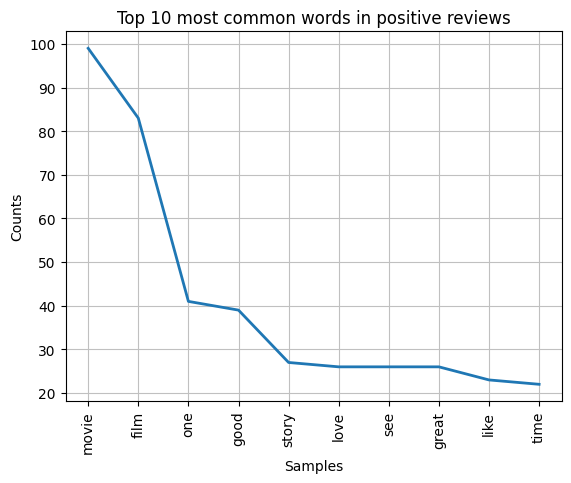

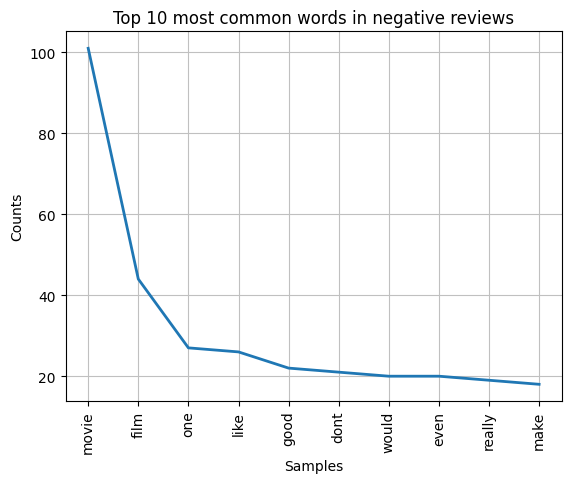

<Axes: title={'center': 'Top 10 most common words in negative reviews'}, xlabel='Samples', ylabel='Counts'>

In [31]:
train_positive_reviews_freq_dist = FreqDist(train_positive_reviews_text.split())
train_negative_reviews_freq_dist = FreqDist(train_negative_reviews_text.split())

train_positive_reviews_freq_dist.plot(10, title='Top 10 most common words in positive reviews')
train_negative_reviews_freq_dist.plot(10, title='Top 10 most common words in negative reviews')

### <a id='toc1_5_5_'></a>[Feature Distribution](#toc0_)

#### <a id='toc1_5_5_1_'></a>[Train](#toc0_)

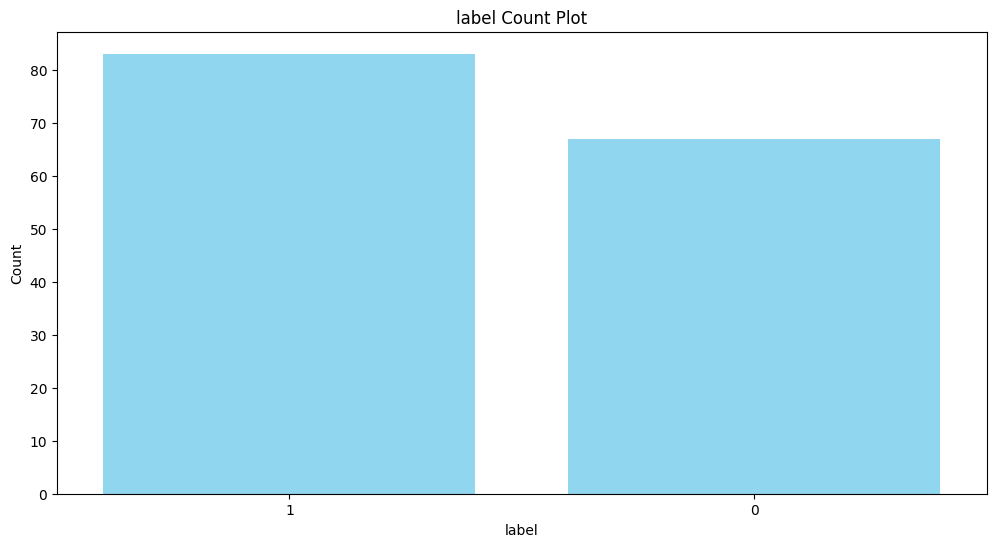

In [32]:
count_plot(train_df, 'label')

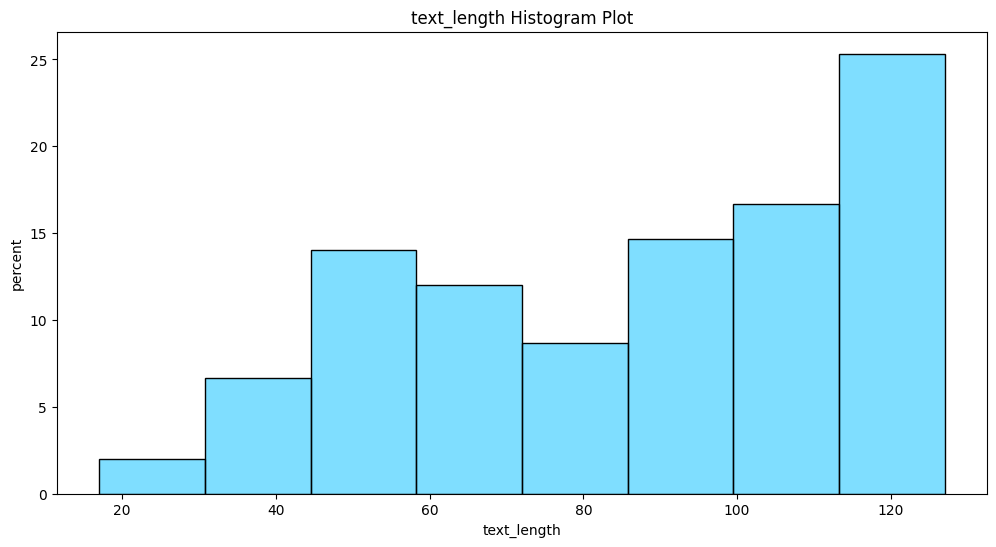

In [33]:
train_df_text_lengths = get_text_lengths(train_df)
train_df_text_lengths = train_df_text_lengths.to_frame()
train_df_text_lengths.columns = ['text_length']
hist_plot(train_df_text_lengths, 'text_length', figsize=(12, 6), kde=False, normal_estimation=False, rule='sturges', stat='percent')

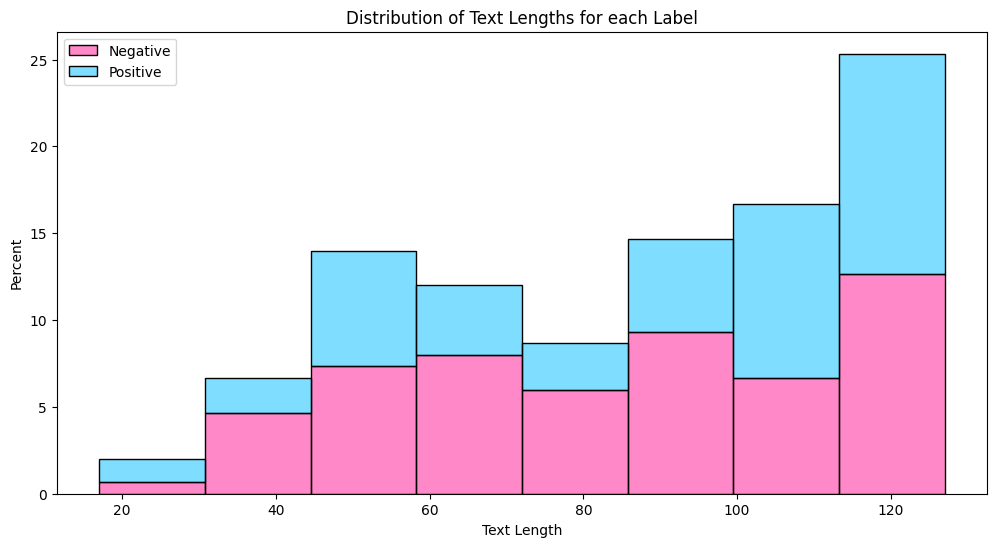

In [34]:
# distribution of text lengths for each label
plt.figure(figsize=(12, 6))
sns.histplot(data=train_df_text_lengths, x='text_length', hue=train_df['label'], bins=8, palette=['deepskyblue', 'deeppink'], alpha=0.5, stat='percent', edgecolor='black', multiple='stack')

plt.xlabel('Text Length')
plt.ylabel('Percent')
plt.title('Distribution of Text Lengths for each Label')
plt.legend(['Negative', 'Positive'])
plt.show()

#### <a id='toc1_5_5_2_'></a>[Test](#toc0_)

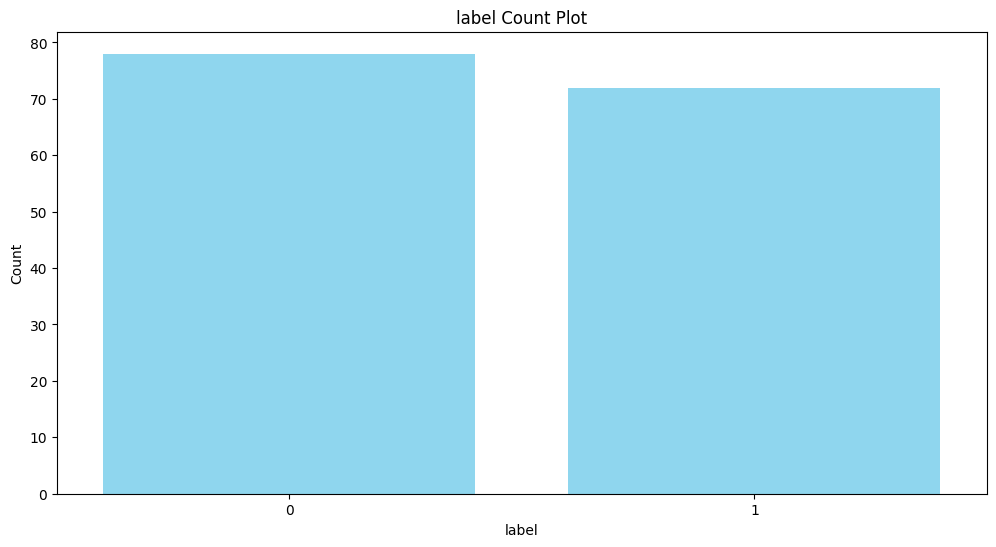

In [35]:
count_plot(test_df, 'label')

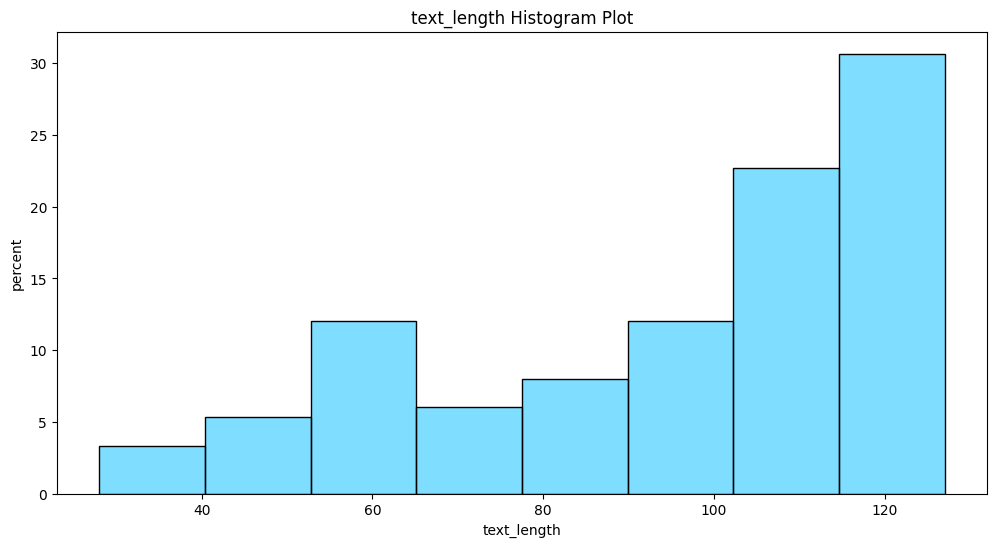

In [36]:
test_df_text_lengths = get_text_lengths(test_df)
test_df_text_lengths = test_df_text_lengths.to_frame()
test_df_text_lengths.columns = ['text_length']
hist_plot(test_df_text_lengths, 'text_length', figsize=(12, 6), kde=False, normal_estimation=False, rule='sturges', stat='percent')

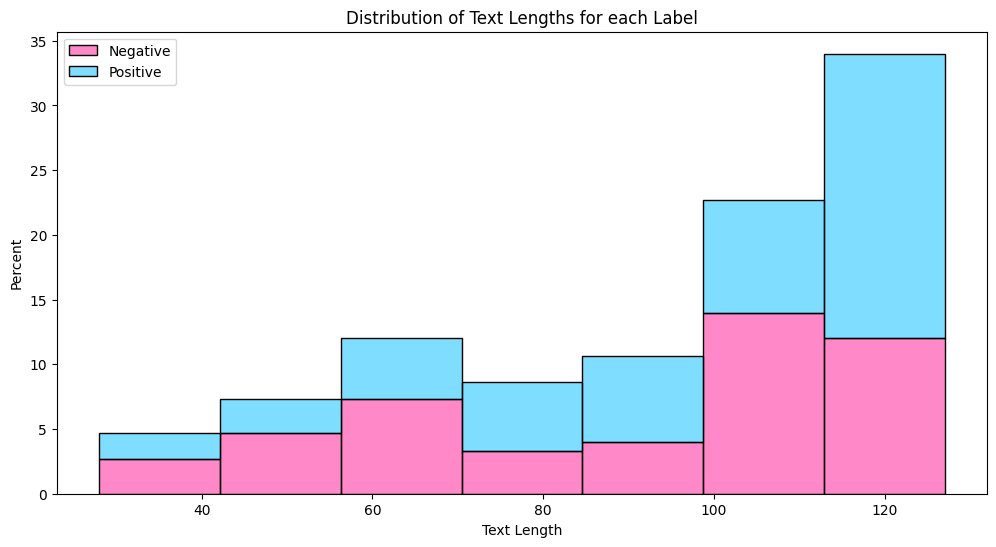

In [37]:
# distribution of text lengths for each label
plt.figure(figsize=(12, 6))
sns.histplot(data=test_df_text_lengths, x='text_length', hue=test_df['label'], bins=7, palette=['deepskyblue', 'deeppink'], alpha=0.5, stat='percent', edgecolor='black', multiple='stack')
plt.xlabel('Text Length')
plt.ylabel('Percent')
plt.title('Distribution of Text Lengths for each Label')
plt.legend(['Negative', 'Positive'])
plt.show()

#### <a id='toc1_5_5_3_'></a>[Unlabelled](#toc0_)

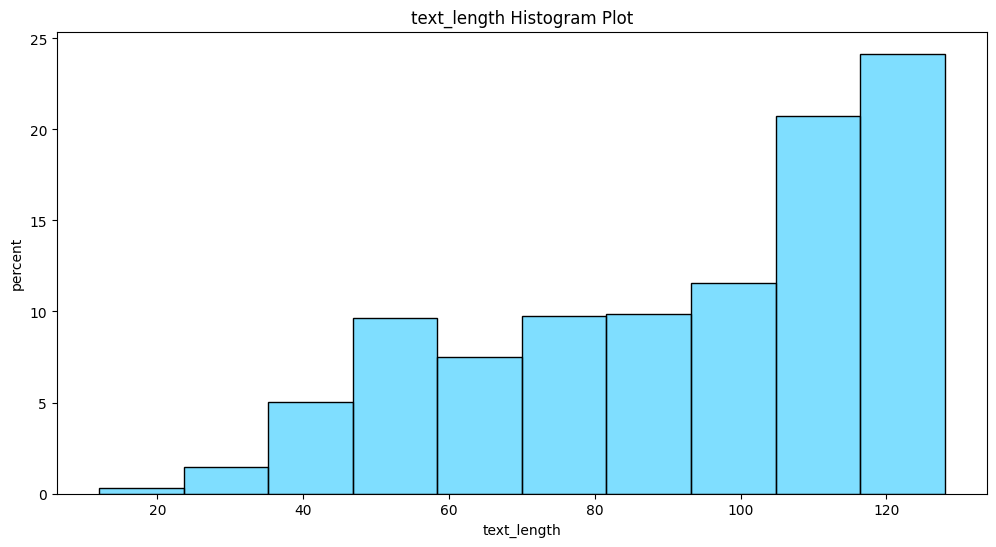

In [38]:
unlabelled_df_text_lengths = get_text_lengths(unlabelled_df)
unlabelled_df_text_lengths = unlabelled_df_text_lengths.to_frame()
unlabelled_df_text_lengths.columns = ['text_length']
hist_plot(unlabelled_df_text_lengths, 'text_length', figsize=(12, 6), kde=False, normal_estimation=False, rule='sturges', stat='percent')

### <a id='toc1_5_6_'></a>[Word Cloud](#toc0_)

#### <a id='toc1_5_6_1_'></a>[Train](#toc0_)

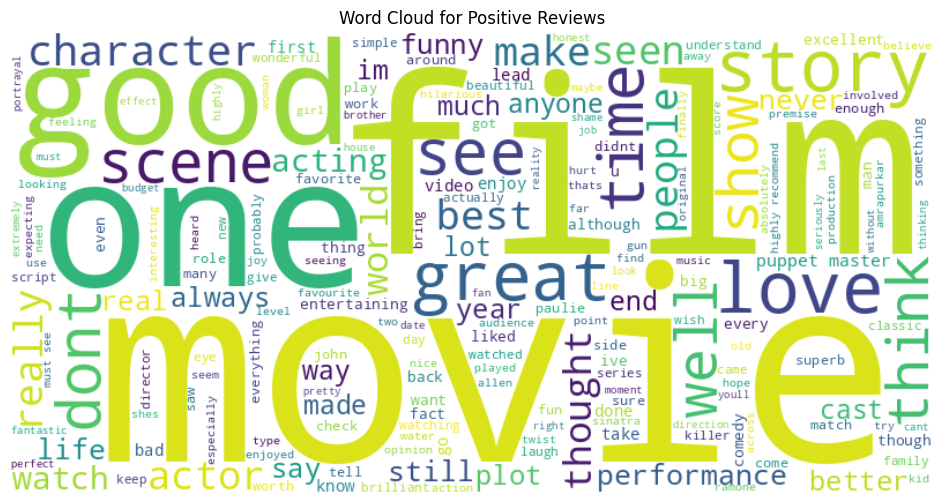

In [39]:
# word cloud for positive reviews
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(train_positive_reviews_text)
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Positive Reviews')
plt.show()

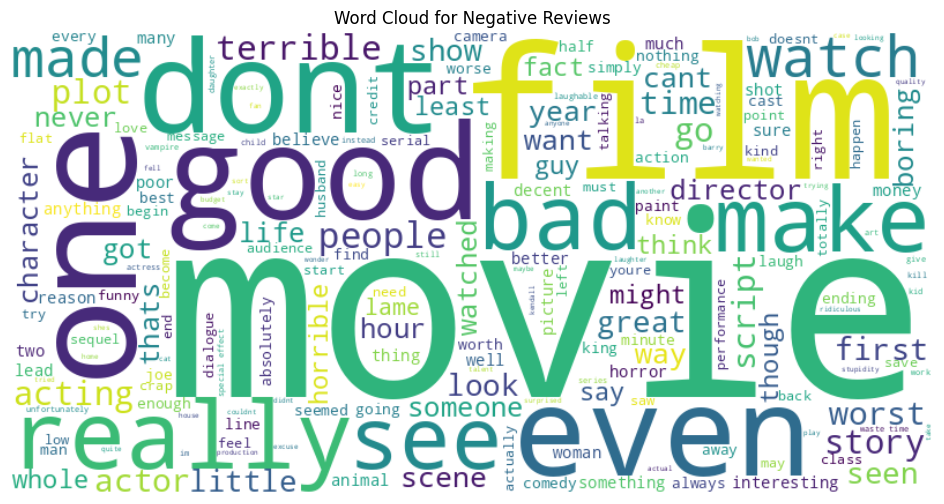

In [40]:
# word cloud for negative reviews
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(train_negative_reviews_text)
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Negative Reviews')
plt.show()

#### <a id='toc1_5_6_2_'></a>[Test](#toc0_)

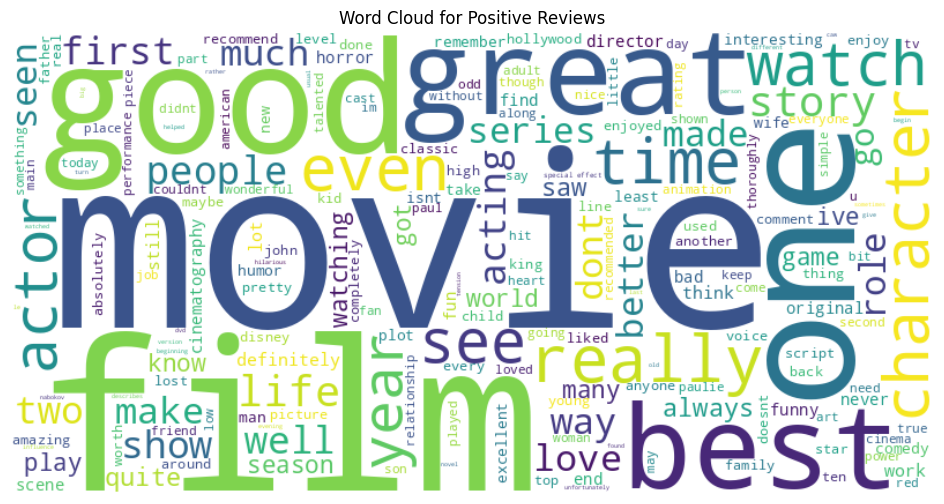

In [41]:
# word cloud for positive reviews
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(test_positive_reviews_text)
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Positive Reviews')
plt.show()

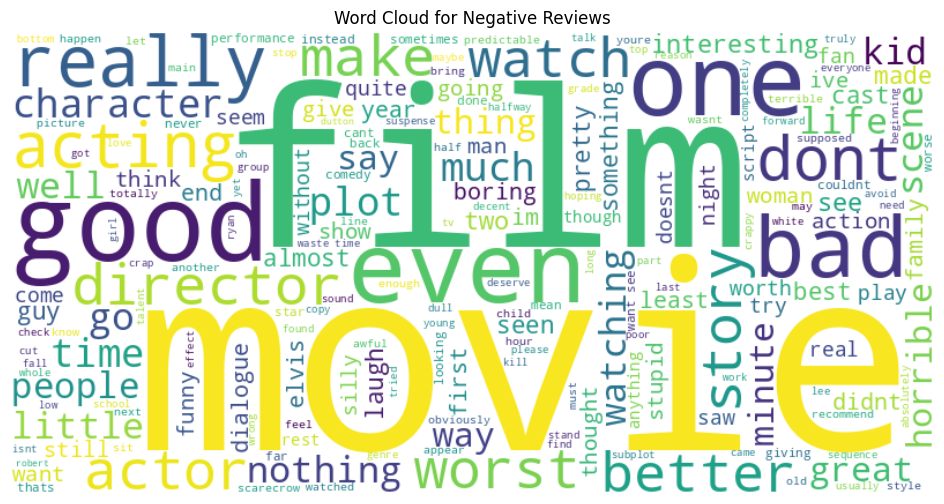

In [42]:
# word cloud for negative reviews
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(test_negative_reviews_text)
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Negative Reviews')
plt.show()

#### <a id='toc1_5_6_3_'></a>[Unlabelled](#toc0_)

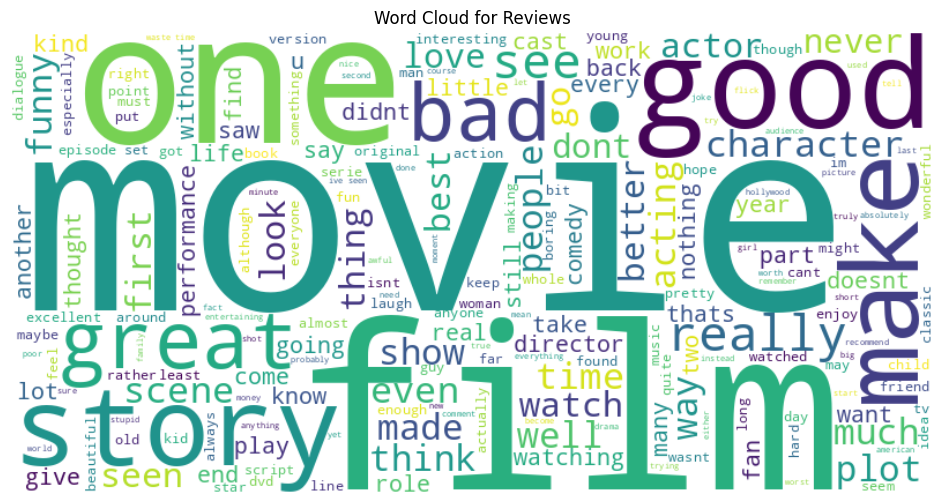

In [43]:
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(unlabelled_reviews_text)
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Reviews')
plt.show()

## <a id='toc1_6_'></a>[Feature Engineering](#toc0_)

In [44]:
N_COMPONENTS = 0.90
RANDOM_STATE = 42

In [45]:
pca = PCA(n_components=N_COMPONENTS, random_state=RANDOM_STATE)
pca.fit(unlabelled_df['embedding'].tolist())

PCA(n_components=0.9, random_state=42)

In [46]:
train_df_pca_embedding = pca.transform(train_df['embedding'].tolist())
train_df['embedding'] = pd.Series(train_df_pca_embedding.tolist(), index=train_df.index)

# print(len(train_df['pca_embedding'][0]))
print(len(train_df['embedding'][0]))

143


In [47]:
unlabelled_df_pca_embedding = pca.transform(unlabelled_df['embedding'].tolist())
unlabelled_df['embedding'] = pd.Series(unlabelled_df_pca_embedding.tolist(), index=unlabelled_df.index)

# print(len(unlabelled_df['pca_embedding'][0]))
print(len(unlabelled_df['embedding'][0]))

143


In [48]:
test_df_pca_embedding = pca.transform(test_df['embedding'].tolist())
test_df['embedding'] = pd.Series(test_df_pca_embedding.tolist(), index=test_df.index)

# print(len(test_df['pca_embedding'][0]))
print(len(test_df['embedding'][0]))

143


## <a id='toc1_7_'></a>[Classifier](#toc0_)

Here we define a Random Forest and a Neural Network model to use in the further sections of the notebook.

### <a id='toc1_7_1_'></a>[Random Forest](#toc0_)

In [49]:
random_forest = RandomForestClassifier(n_estimators=100, random_state=RANDOM_STATE)

### <a id='toc1_7_2_'></a>[Neural Network](#toc0_)

In [50]:
class TextDataset(Dataset):
    def __init__(self, texts, labels, embeddings):
        self.texts = texts
        self.labels = labels
        self.embeddings = embeddings

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        text = self.texts[idx]
        label = self.labels[idx]
        embedding = self.embeddings[idx]
        return text, label, embedding

In [51]:
class TextClassifier(nn.Module):
    def __init__(self, input_size, hidden_size, output_size, dropout_rate):
        super(TextClassifier, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.fc2 = nn.Linear(hidden_size, output_size)
        self.dropout = nn.Dropout(dropout_rate)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)
        return x

In [52]:
def train_text_classifier(model, train_loader, criterion, optimizer, num_epochs):
    model.train()

    loss_vals = []
    num_preds = []
    cor_preds = []

    for epoch in tqdm.tqdm(range(num_epochs), desc='Training', total=num_epochs):
        running_loss = 0.0
        correct_preds = 0
        total_preds = 0

        for texts, labels, embeddings in train_loader:
            labels = labels.to(DEVICE)
            embeddings = embeddings.to(DEVICE)

            optimizer.zero_grad()

            outputs = model(embeddings)
            predictions = torch.argmax(outputs, dim=1)

            loss = criterion(outputs, labels)

            loss.backward()
            optimizer.step()

            running_loss += loss.item()
            correct_preds += torch.sum(predictions == labels).item()
            total_preds += len(labels)

        epoch_loss = running_loss / len(train_loader)
        loss_vals.append(epoch_loss)
        num_preds.append(total_preds)
        cor_preds.append(correct_preds)

    return loss_vals, num_preds, cor_preds


In [53]:
def plot_training_summary(loss_vals, num_preds, cor_preds):
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    plt.plot(np.linspace(1, len(loss_vals), len(loss_vals)), loss_vals, color='deepskyblue', linewidth=2)
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Training Loss')

    plt.subplot(1, 2, 2)
    accuracy = [cor_preds[i] / num_preds[i] for i in range(len(cor_preds))]
    plt.plot(np.linspace(1, len(accuracy), len(accuracy)), accuracy, color='deeppink', linewidth=2)
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title('Training Accuracy')

    plt.tight_layout()
    plt.show()


In [54]:
def evaluate_text_classifier(model, test_loader):
    model.eval()

    correct_preds = 0
    total_preds = 0

    with torch.no_grad():
        for texts, labels, embeddings in test_loader:
            texts = texts.to(DEVICE)
            labels = labels.to(DEVICE)
            embeddings = embeddings.to(DEVICE)

            outputs = model(embeddings)
            predictions = torch.argmax(outputs, dim=1)

            correct_preds += torch.sum(predictions == labels).item()
            total_preds += len(labels)

    return correct_preds, total_preds

## <a id='toc1_8_'></a>[Semi-Supervised Learning](#toc0_)

First of all, let's put all of the embeddings from the train and test dataframes in a single dataframe, in order to be used for training semi-supervised models.

In [55]:
train_embeddings = np.array(train_df['embedding'].tolist())
test_embeddings = np.array(test_df['embedding'].tolist())
unlabelled_embeddings = np.array(unlabelled_df['embedding'].tolist())
# all_embeddings = pd.concat([train_df['embedding'], unlabelled_df['embedding']])
all_embeddings = np.concatenate((train_embeddings, unlabelled_embeddings))

Now we use all emeddings to train a classifier model, and then we use it to predict the labels of the unlabelled data.

We use KMeans, KNN, graph-based, Random Forest, and SVC models to achieve our goal.

#### <a id='toc1_8_1_1_'></a>[KMeans](#toc0_)

In [56]:
N_CLUSTERS = 6

In [57]:
kmeans = KMeans(n_clusters=N_CLUSTERS, random_state=RANDOM_STATE)
kmeans.fit(all_embeddings)
clusters = kmeans.predict(all_embeddings)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [58]:
train_clusters = clusters[:len(train_df)]
unlabelled_clusters = clusters[len(train_df):]

cluster_label_map = defaultdict(int)
for cluster in set(train_clusters):
    cluster_indices = train_df[train_clusters == cluster].index
    cluster_labels = train_df.loc[cluster_indices, 'label']
    cluster_label = Counter(cluster_labels).most_common(1)[0][0]
    cluster_label_map[cluster] = cluster_label

In [59]:
unlabelled_df['label_kmeans'] = [cluster_label_map[cluster] for cluster in unlabelled_clusters]
unlabelled_df['label_kmeans'].value_counts()

label_kmeans
1    634
0    380
Name: count, dtype: int64

In [60]:
# show sample reviews from each label
N_SAMPLES = 10

print('Positive Reviews:')
print(unlabelled_df[unlabelled_df['label_kmeans'] == 1]['text'].sample(n=N_SAMPLES, random_state=RANDOM_STATE).values)
print()
print('Negative Reviews:')
print(unlabelled_df[unlabelled_df['label_kmeans'] == 0]['text'].sample(n=N_SAMPLES, random_state=RANDOM_STATE).values)

Positive Reviews:
['don\'t see this movie. bad acting and stupid gore effects. a complete waste of time. i was hoping to see a lot of cool murders and hot chicks,instead the director depended on animal slaughter videos to shock you, the watcher. disgusting. the murders are pretty lame, basically strangulation. one woman he stuffs worms in her mouth, one he puts raw hamburgers on her face and strangles her. btk = btk broiler, burger king\'s "killer" new sandwich....ha ha. i don\'t think this movie relied too much on actual facts. i mean, he real btk killer didn\'t carry around a bunch of rodents, scorpions and worms..and oh yeah...a slaughtered cow head too. go figure.'
 'i am a current a.s.l. student & was forced to watch this movie in class, and what i got out of it was the blatant bias involved in the film. the film is obviously leaning towards to p.o.v. of the "common deaf perception" their is no middle ground. also, the film didn\'t make mention or take into account other situation

#### <a id='toc1_8_1_2_'></a>[KNN](#toc0_)

In [61]:
N_NEIGHBORS = 5

In [62]:
knn = KNeighborsClassifier(n_neighbors=N_NEIGHBORS)
knn.fit(np.array(train_embeddings), np.array(train_df['label']))
knn_predictions = knn.predict(unlabelled_embeddings)

In [63]:
unlabelled_df['label_knn'] = knn_predictions
unlabelled_df['label_knn'].value_counts()

label_knn
0    531
1    483
Name: count, dtype: int64

In [64]:
# show sample reviews from each label
print('Positive Reviews:')
print(unlabelled_df[unlabelled_df['label_knn'] == 1]['text'].sample(n=N_SAMPLES, random_state=RANDOM_STATE).values)
print()
print('Negative Reviews:')
print(unlabelled_df[unlabelled_df['label_knn'] == 0]['text'].sample(n=N_SAMPLES, random_state=RANDOM_STATE).values)

Positive Reviews:
['probably the finest fantasy film ever made. sumptuous colour, spectacular sets, incredible, spot-on miklos rosza musical score that is perfect for each scene and mood. acting is superb as well in what could have been stiff and pretentious in lesser hands, but here the poetic dialog is deftly, sensitively spoken (the humour is subtle and delightful as well).<br /><br />doubtless spielberg and lucas were enthralled by this one. along with "the four feathers" (1939), one of the two finest motion pictures released by alexander korda and london films---and one of the finest motion pictures ever made.<br /><br />a true, compelling classic!'
 '"the ladies man" suffers a common problem among movies based on "saturday night live" skits. and that is, a sketch that usually succeeds in five minutes will not do so well in ninety minutes. although this movie does have its laughs, like tim meadows as leon phelps, a sex-maniac straight out of the \'70s, and will ferrell as a wrestl

#### <a id='toc1_8_1_3_'></a>[Graph-based](#toc0_)

In [65]:
y_train = train_df['label'].tolist()
y_unlabelled = [-1] * len(unlabelled_df)
all_labels = y_train + y_unlabelled

In [66]:
label_propagation = LabelPropagation()
label_propagation.fit(all_embeddings, all_labels)
label_propagation_predicted_labels = label_propagation.transduction_[len(train_df):]

In [67]:
unlabelled_df['label_label_propagation'] = label_propagation_predicted_labels
unlabelled_df['label_label_propagation'].value_counts()

label_label_propagation
1    516
0    498
Name: count, dtype: int64

In [68]:
# show sample reviews from each label
print('Positive Reviews:')
print(unlabelled_df[unlabelled_df['label_label_propagation'] == 1]['text'].sample(n=N_SAMPLES, random_state=RANDOM_STATE).values)
print()
print('Negative Reviews:')
print(unlabelled_df[unlabelled_df['label_label_propagation'] == 0]['text'].sample(n=N_SAMPLES, random_state=RANDOM_STATE).values)

Positive Reviews:
['when i first saw this film, in london, in 1958, i was bowled over. i had never seen a film like this before. it had a strange, hypnotic effect, quite unlike the films that i had seen previously and it left a lasting impact.<br /><br />i believe that odile versios & marina vlady are sisters, if not twins. certainly the interaction is amazing in its power to influence the viewer.<br /><br />if this has been converted to dvd - in region 2 format - and in the original french language, i would love to hear about it & where it can be purchased.'
 'bugs bunny accidentally ends up at the south pole while trying to vacation in florida. where he meets a little penquin, which he tries to save from an eskimo. this short tries and the penquin is adorable, but in the end it\'s a bit too light in the laughs department. the eskimo isn\'t really that great of a foil for bugs and i just seen a lot better bugs bunny cartoons frankly, even other shorts when he\'s paired with other unkn

#### <a id='toc1_8_1_4_'></a>[Expectation-Maximization](#toc0_)

In [69]:
# TODO

#### <a id='toc1_8_1_5_'></a>[Self-Training with Confidence Threshold](#toc0_)

##### <a id='toc1_8_1_5_1_'></a>[Random Forest](#toc0_)

In [70]:
random_forest_self_training = RandomForestClassifier(n_estimators=50, random_state=RANDOM_STATE)
self_training_random_forest = SelfTrainingClassifier(random_forest_self_training, criterion='threshold', threshold=0.9, max_iter=10)
self_training_random_forest.fit(all_embeddings, all_labels)
self_training_random_forest_predictions = self_training_random_forest.predict(unlabelled_embeddings)

In [71]:
unlabelled_df['label_self_training_random_forest'] = self_training_random_forest_predictions
unlabelled_df['label_self_training_random_forest'].value_counts()

label_self_training_random_forest
1    613
0    401
Name: count, dtype: int64

In [72]:
# show sample reviews from each label
print('Positive Reviews:')
print(unlabelled_df[unlabelled_df['label_self_training_random_forest'] == 1]['text'].sample(n=N_SAMPLES, random_state=RANDOM_STATE).values)
print()
print('Negative Reviews:')
print(unlabelled_df[unlabelled_df['label_self_training_random_forest'] == 0]['text'].sample(n=N_SAMPLES, random_state=RANDOM_STATE).values)

Positive Reviews:
["go immediately and rent this movie. it will be be on a bottom shelf in your local video store and will be covered in dust. no one will have touched it in years. it may even be a $.50 special! it's worth ten bucks, i swear! buy it! there aren't very many films than can compare with this - the celluloid version of that goo that forms at the bottom of a trash can after a few years. yes, i gave it a '1,' but it really deserves much lower. 1-10 scales were not designed with stuff like this in mind."
 'does anyone happen to know where this film was shot? the aviation scene on the cliff is beautiful. it appears to be england. however, ivy\'s apartment building certainly looks like the brill building, with its fascinating elevators.<br /><br />charles mendl is listed as playing "sir charles gage". maybe i blinked, but i never saw him. perhaps he was the husband\'s lawyer, but, again, i don\'t recall that character being in the film, other than being mentioned as having made

In [73]:
unlabelled_df['label_self_training_random_forest'].value_counts()

label_self_training_random_forest
1    613
0    401
Name: count, dtype: int64

##### <a id='toc1_8_1_5_2_'></a>[SVC](#toc0_)

In [74]:
svc_self_training = SVC(probability=True)
self_training_svc = SelfTrainingClassifier(svc_self_training, criterion='threshold', threshold=0.9, max_iter=10)
self_training_svc.fit(all_embeddings, all_labels)
self_training_svc_predictions = self_training_svc.predict(unlabelled_embeddings)

In [75]:
unlabelled_df['label_self_training_svc'] = self_training_svc_predictions
unlabelled_df['label_self_training_svc'].value_counts()

label_self_training_svc
1    551
0    463
Name: count, dtype: int64

In [76]:
# show sample reviews from each label
print('Positive Reviews:')
print(unlabelled_df[unlabelled_df['label_self_training_svc'] == 1]['text'].sample(n=N_SAMPLES, random_state=RANDOM_STATE).values)
print()
print('Negative Reviews:')
print(unlabelled_df[unlabelled_df['label_self_training_svc'] == 0]['text'].sample(n=N_SAMPLES, random_state=RANDOM_STATE).values)

Positive Reviews:
['this episode is certainly different than all the other columbos, though some of the details are still there, the setup is completely different. that makes this columbo unique, and interesting to watch, even though at times you might wish for the old columbo. i liked it a lot, but then, i like almost any columbo.'
 "rather then long dance sequences and close ups of the characters which made the film drag on - the movie would have been better served explaining the story and motivations of the characters.<br /><br />the marginalisation of nubo, the minister, auntie, mother - and the dumbing down of the dynamic and important rivalry between hatsumo and mameha and hatsumo and sayuri made the movie lack any real depth. if you hadn't read the book you would not really understand why sayuri loved the chairman and why mameha became her mentor at all.<br /><br />visually the film was stunning - and the actors all did the best with the c rate script they were given, but that w

In [77]:
unlabelled_df['label_self_training_svc'].value_counts()

label_self_training_svc
1    551
0    463
Name: count, dtype: int64

#### <a id='toc1_8_1_6_'></a>[Saving the Results](#toc0_)

In [78]:
# save the new unlabelled data as jsonl
from google.colab import files

UNLABELLED_OUTPUT_DATA_PATH = 'unlabelled_imdb_labelPropagated.jsonl'
unlabelled_df.to_json(UNLABELLED_OUTPUT_DATA_PATH, orient='records', lines=True)
files.download(UNLABELLED_OUTPUT_DATA_PATH)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### <a id='toc1_8_2_'></a>[LLMs](#toc0_)

Let's Define the text generation function using Phi-3 model to label our data.



In [79]:
def generate_text(model, tokenizer, prompt, max_new_tokens = 100, do_sample=True, temperature=0.5):

    input_ids = tokenizer.encode(prompt, return_tensors='pt').to(DEVICE)
    if do_sample:
        output_ids = model.generate(input_ids, max_new_tokens=max_new_tokens, do_sample=True, temperature=temperature)
    else:
        output_ids = model.generate(input_ids, max_new_tokens=max_new_tokens, do_sample=do_sample)

    output_text = tokenizer.decode(output_ids[0], skip_special_tokens=True)

    return output_text[len(prompt):]

Now we can write a function to label a given review. To do so, we use two-shot method to enhance the functionality of the model.

In [80]:
# Define a counter
counter = {'count': 0}

def label_review(review: str):
    prompt_text = f"""Question: Label the following movie review as positive or negative. Print 1 if it is positive, and print 0 if it is negative. Don't explain, just print the label. Review: {unlabelled_df.iloc[2]['text']}
Answer: 1
Question: Label the following movie review as positive or negative. Print 1 if it is positive, and print 0 if it is negative. Don't explain, just print the label. Review: {review}
"""
    response = generate_text(
        model=model,
        tokenizer=tokenizer,
        prompt=prompt_text,
        do_sample=True,
        max_new_tokens=7,
        temperature=0.7
    )
    # Extracting the first word from the response which should be the label
    label = response.split()[1]
    counter['count'] += 1
    print(counter['count'])
    return int(label)

Time to label our data using our LLM!

In [81]:
# unlabelled_df['label_llm'] = unlabelled_df['text'].apply(label_review)

In [82]:
# unlabelled_df['label_llm'].value_counts()

In [83]:
unlabelled_df['label_llm'] = unlabelled_new_df['label_llm']

Let's put Nan for the rows which has

In [84]:
# unlabelled_df.loc[unlabelled_df['label_llm'] == 'The', 'label_llm'] = -1
# unlabelled_df.loc[unlabelled_df['label_llm'] == 'Despite', 'label_llm'] = -1
unlabelled_df.loc[unlabelled_df['label_llm'] == -1 , 'label_llm'] = 0

In [85]:
# # prompt_text = f"""Instruction: I will give you a review about a movie, and ask you to classify it to positive or negative. Print 1 if it is positive, and print 0 if it is negative.
# # Question: Label the following movie review as positive or negative. Print 1 if it is positive, and print 0 if it is negative. Don't explain, just print the label. Review: {unlabelled_df.iloc[2]['text']}
# # Answer: 1
# # Question: Label the following movie review as positive or negative. Print 1 if it is positive, and print 0 if it is negative. Don't explain, just print the label. Review: {unlabelled_df.iloc[5]['text']}
# # """

# prompt_text = f"""Question: Label the following movie review as positive or negative. Print 1 if it is positive, and print 0 if it is negative. Don't explain, just print the label. Review: {unlabelled_df.iloc[2]['text']}
# Answer: 1
# Question: Label the following movie review as positive or negative. Print 1 if it is positive, and print 0 if it is negative. Don't explain, just print the label. Review: {unlabelled_df.iloc[7]['text']}
# """

# # print(prompt_text, '\n')
# response = generate_text(
#     model=model,
#     tokenizer=tokenizer,
#     prompt=prompt_text,
#     do_sample=True,
#     max_new_tokens=10,
#     temperature=1.2
# )

# label = response.split()[1]
# print(label)
# print(response)

## <a id='toc1_9_'></a>[Training](#toc0_)

In this section we train models by using the train dataset, and then evaluate the model by using test dataset.

### <a id='toc1_9_1_'></a>[Data Preparation](#toc0_)

In [86]:
train_embeddings_raw = train_embeddings
train_labels_raw = np.array(train_df['label'])

In [87]:
train_embeddings_kmeans = np.concatenate([train_embeddings, unlabelled_embeddings], axis=0)
train_labels_kmeans = np.concatenate([train_labels_raw, unlabelled_df['label_kmeans']])

In [88]:
train_embeddings_knn = np.concatenate([train_embeddings, unlabelled_embeddings], axis=0)
train_labels_knn = np.concatenate([train_labels_raw, unlabelled_df['label_knn']])

In [89]:
train_embeddings_label_propagation = np.concatenate([train_embeddings, unlabelled_embeddings], axis=0)
train_labels_label_propagation = np.concatenate([train_labels_raw, unlabelled_df['label_label_propagation']])

In [90]:
train_embeddings_self_training_random_forest = np.concatenate([train_embeddings, unlabelled_embeddings], axis=0)
train_labels_self_training_random_forest = np.concatenate([train_labels_raw, unlabelled_df['label_self_training_random_forest']])

In [91]:
train_embeddings_self_training_svc = np.concatenate([train_embeddings, unlabelled_embeddings], axis=0)
train_labels_self_training_svc = np.concatenate([train_labels_raw, unlabelled_df['label_self_training_svc']])

In [92]:
train_embeddings_llm = np.concatenate([train_embeddings, unlabelled_embeddings], axis=0)
train_labels_llm = np.concatenate([train_labels_raw, unlabelled_df['label_llm']])

In [93]:
test_embeddings = np.array(test_df['embedding'].tolist())
test_labels = np.array(test_df['label'])

### <a id='toc1_9_2_'></a>[Random Forest](#toc0_)

In [94]:
N_ESTIMATORS = 50

#### <a id='toc1_9_2_1_'></a>[Raw Data](#toc0_)

In [95]:
random_forest_raw = RandomForestClassifier(n_estimators=N_ESTIMATORS, random_state=RANDOM_STATE)
random_forest_raw.fit(train_embeddings_raw, train_labels_raw)
random_forest_raw_predictions = random_forest_raw.predict(test_embeddings)

#### <a id='toc1_9_2_2_'></a>[KMeans](#toc0_)

In [96]:
random_forest_kmeans = RandomForestClassifier(n_estimators=N_ESTIMATORS, random_state=RANDOM_STATE)
random_forest_kmeans.fit(train_embeddings_kmeans, train_labels_kmeans)
random_forest_kmeans_predictions = random_forest_kmeans.predict(test_embeddings)

#### <a id='toc1_9_2_3_'></a>[KNN](#toc0_)

In [97]:
random_forest_knn = RandomForestClassifier(n_estimators=N_ESTIMATORS, random_state=RANDOM_STATE)
random_forest_knn.fit(train_embeddings_knn, train_labels_knn)
random_forest_knn_predictions = random_forest_knn.predict(test_embeddings)

#### <a id='toc1_9_2_4_'></a>[Graph-based](#toc0_)

In [98]:
random_forest_label_propagation = RandomForestClassifier(n_estimators=N_ESTIMATORS, random_state=RANDOM_STATE)
random_forest_label_propagation.fit(train_embeddings_label_propagation, train_labels_label_propagation)
random_forest_label_propagation_predictions = random_forest_label_propagation.predict(test_embeddings)

#### <a id='toc1_9_2_5_'></a>[Self-Training with Confidence Threshold](#toc0_)

##### <a id='toc1_9_2_5_1_'></a>[Random Forest](#toc0_)

In [99]:
random_forest_self_training_random_forest = RandomForestClassifier(n_estimators=N_ESTIMATORS, random_state=RANDOM_STATE)
random_forest_self_training_random_forest.fit(train_embeddings_self_training_random_forest, train_labels_self_training_random_forest)
random_forest_self_training_random_forest_predictions = random_forest_self_training_random_forest.predict(test_embeddings)

##### <a id='toc1_9_2_5_2_'></a>[SVC](#toc0_)

In [100]:
random_forest_self_training_svc = RandomForestClassifier(n_estimators=N_ESTIMATORS, random_state=RANDOM_STATE)
random_forest_self_training_svc.fit(train_embeddings_self_training_svc, train_labels_self_training_svc)
random_forest_self_training_svc_predictions = random_forest_self_training_svc.predict(test_embeddings)

#### <a id='toc1_9_2_6_'></a>[LLM](#toc0_)

In [101]:
random_forest_llm = RandomForestClassifier(n_estimators=N_ESTIMATORS, random_state=RANDOM_STATE)
random_forest_llm.fit(train_embeddings_llm, train_labels_llm)
random_forest_llm_predictions = random_forest_llm.predict(test_embeddings)

### <a id='toc1_9_3_'></a>[Neural Network](#toc0_)

In [102]:
INPUT_SIZE = train_embeddings.shape[1]
HIDDEN_SIZE = 128
OUTPUT_SIZE = 2
DROPOUT_RATE = 0.5
BATCH_SIZE = 8
LEARNING_RATE = 0.001
NUM_EPOCHS = 25

#### <a id='toc1_9_3_1_'></a>[Raw Data](#toc0_)

In [103]:
text_classifier_raw = TextClassifier(INPUT_SIZE, HIDDEN_SIZE, OUTPUT_SIZE, DROPOUT_RATE)
text_classifier_raw.to(DEVICE)
train_loader_raw = DataLoader(TextDataset(train_df['text'], train_df['label'], torch.tensor(train_embeddings_raw, dtype=torch.float32)), batch_size=BATCH_SIZE, shuffle=True)
criterion_raw = nn.CrossEntropyLoss()
optimizer_raw = optim.Adam(text_classifier_raw.parameters(), lr=LEARNING_RATE)

loss_vals_raw, num_preds_raw, cor_preds_raw = train_text_classifier(text_classifier_raw, train_loader_raw, criterion_raw, optimizer_raw, NUM_EPOCHS)

Training: 100%|██████████| 25/25 [00:03<00:00,  8.00it/s]


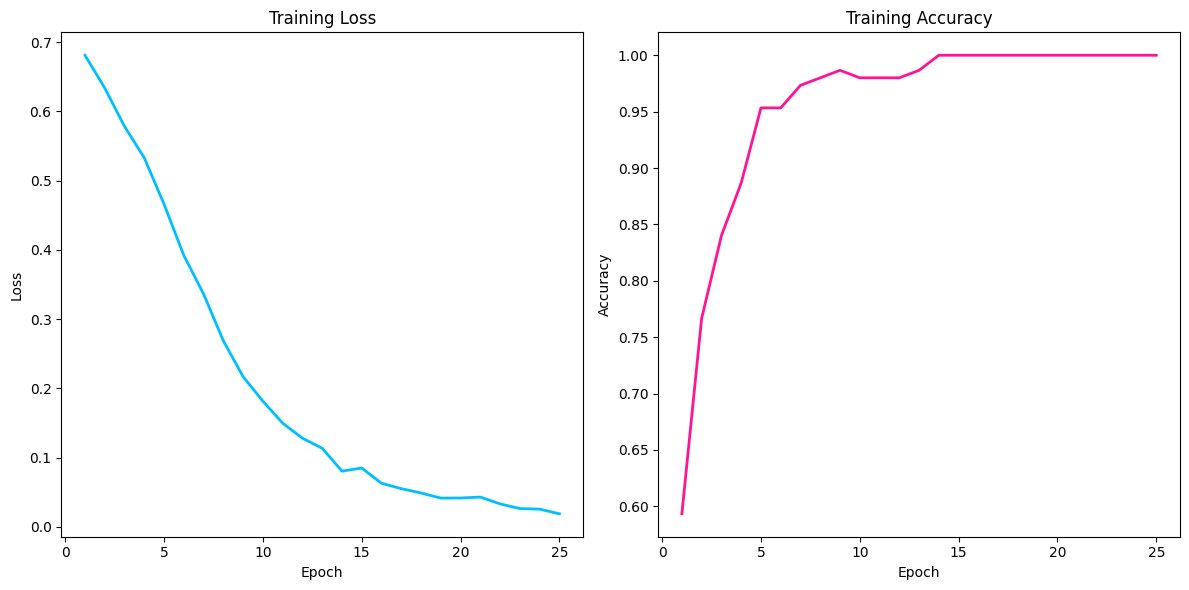

In [104]:
plot_training_summary(loss_vals_raw, num_preds_raw, cor_preds_raw)

#### <a id='toc1_9_3_2_'></a>[KMeans](#toc0_)

In [105]:
text_classifier_kmeans = TextClassifier(INPUT_SIZE, HIDDEN_SIZE, OUTPUT_SIZE, DROPOUT_RATE)
text_classifier_kmeans.to(DEVICE)
texts_kmeans = train_df['text'].tolist() + unlabelled_df['text'].tolist()
labels_kmeans = np.concatenate([train_labels_raw, unlabelled_df['label_kmeans']])
embeddings_kmeans = np.concatenate([train_embeddings_raw, unlabelled_embeddings], axis=0)
train_loader_kmeans = DataLoader(TextDataset(texts_kmeans, labels_kmeans, torch.tensor(embeddings_kmeans, dtype=torch.float32)), batch_size=BATCH_SIZE, shuffle=True)
criterion_kmeans = nn.CrossEntropyLoss()
optimizer_kmeans = optim.Adam(text_classifier_kmeans.parameters(), lr=LEARNING_RATE)

loss_vals_kmeans, num_preds_kmeans, cor_preds_kmeans = train_text_classifier(text_classifier_kmeans, train_loader_kmeans, criterion_kmeans, optimizer_kmeans, NUM_EPOCHS)

Training: 100%|██████████| 25/25 [00:05<00:00,  4.18it/s]


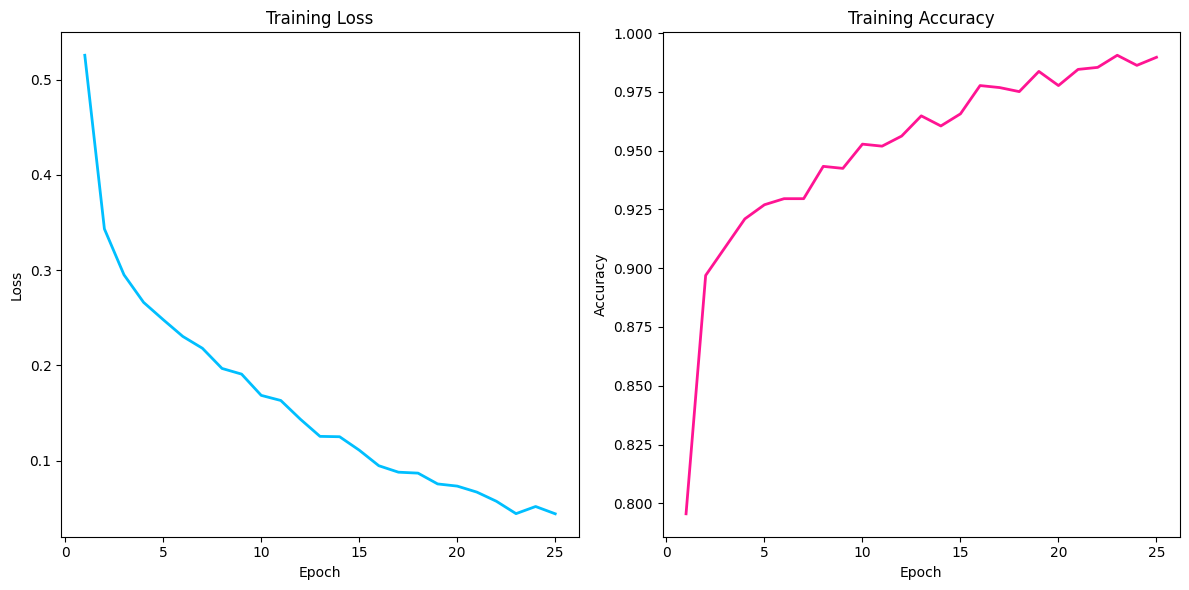

In [106]:
plot_training_summary(loss_vals_kmeans, num_preds_kmeans, cor_preds_kmeans)

#### <a id='toc1_9_3_3_'></a>[KNN](#toc0_)

In [110]:
text_classifier_knn = TextClassifier(INPUT_SIZE, HIDDEN_SIZE, OUTPUT_SIZE, DROPOUT_RATE)
text_classifier_knn.to(DEVICE)
texts_knn = train_df['text'].tolist() + unlabelled_df['text'].tolist()
labels_knn = np.concatenate([train_labels_raw, unlabelled_df['label_knn']])
embeddings_knn = np.concatenate([train_embeddings_raw, unlabelled_embeddings], axis=0)
train_loader_knn = DataLoader(TextDataset(texts_knn, labels_knn, torch.tensor(embeddings_knn, dtype=torch.float32)), batch_size=BATCH_SIZE, shuffle=True)
criterion_knn = nn.CrossEntropyLoss()
optimizer_knn = optim.Adam(text_classifier_knn.parameters(), lr=LEARNING_RATE)

loss_vals_knn, num_preds_knn, cor_preds_knn = train_text_classifier(text_classifier_knn, train_loader_knn, criterion_knn, optimizer_knn, NUM_EPOCHS)

Training: 100%|██████████| 25/25 [00:06<00:00,  4.03it/s]


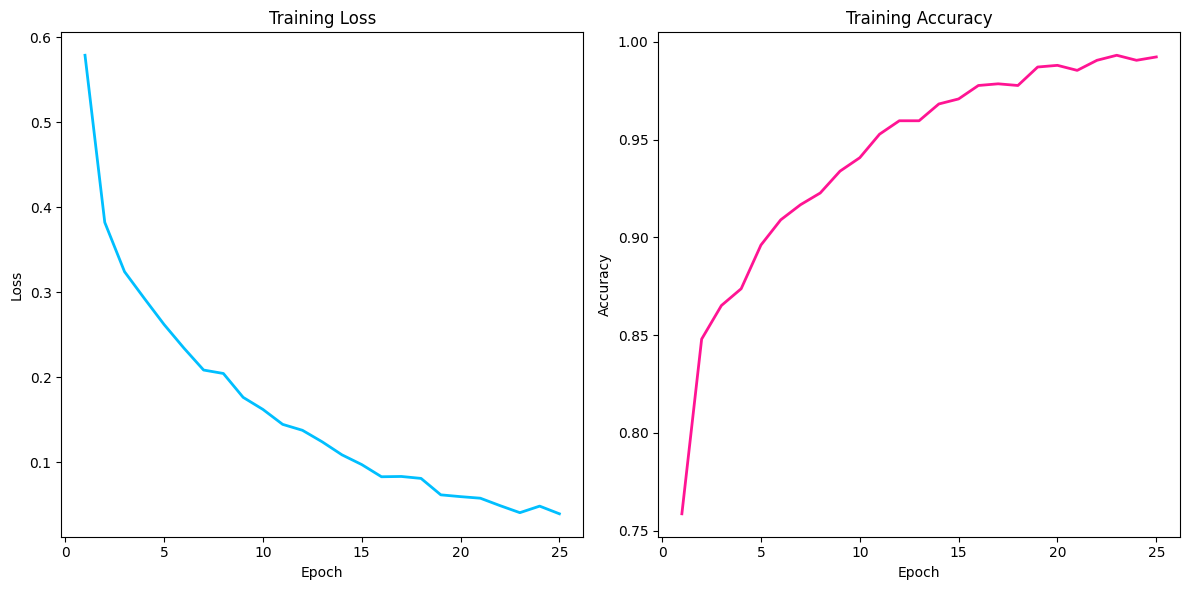

In [111]:
plot_training_summary(loss_vals_knn, num_preds_knn, cor_preds_knn)

#### <a id='toc1_9_3_4_'></a>[Graph-based](#toc0_)

In [112]:
text_classifier_label_propagation = TextClassifier(INPUT_SIZE, HIDDEN_SIZE, OUTPUT_SIZE, DROPOUT_RATE)
text_classifier_label_propagation.to(DEVICE)
texts_label_propagation = train_df['text'].tolist() + unlabelled_df['text'].tolist()
labels_label_propagation = np.concatenate([train_labels_raw, unlabelled_df['label_label_propagation']])
embeddings_label_propagation = np.concatenate([train_embeddings_raw, unlabelled_embeddings], axis=0)
train_loader_label_propagation = DataLoader(TextDataset(texts_label_propagation, labels_label_propagation, torch.tensor(embeddings_label_propagation, dtype=torch.float32)), batch_size=BATCH_SIZE, shuffle=True)
criterion_label_propagation = nn.CrossEntropyLoss()
optimizer_label_propagation = optim.Adam(text_classifier_label_propagation.parameters(), lr=LEARNING_RATE)

loss_vals_label_propagation, num_preds_label_propagation, cor_preds_label_propagation = train_text_classifier(text_classifier_label_propagation, train_loader_label_propagation, criterion_label_propagation, optimizer_label_propagation, NUM_EPOCHS)

Training: 100%|██████████| 25/25 [00:07<00:00,  3.55it/s]


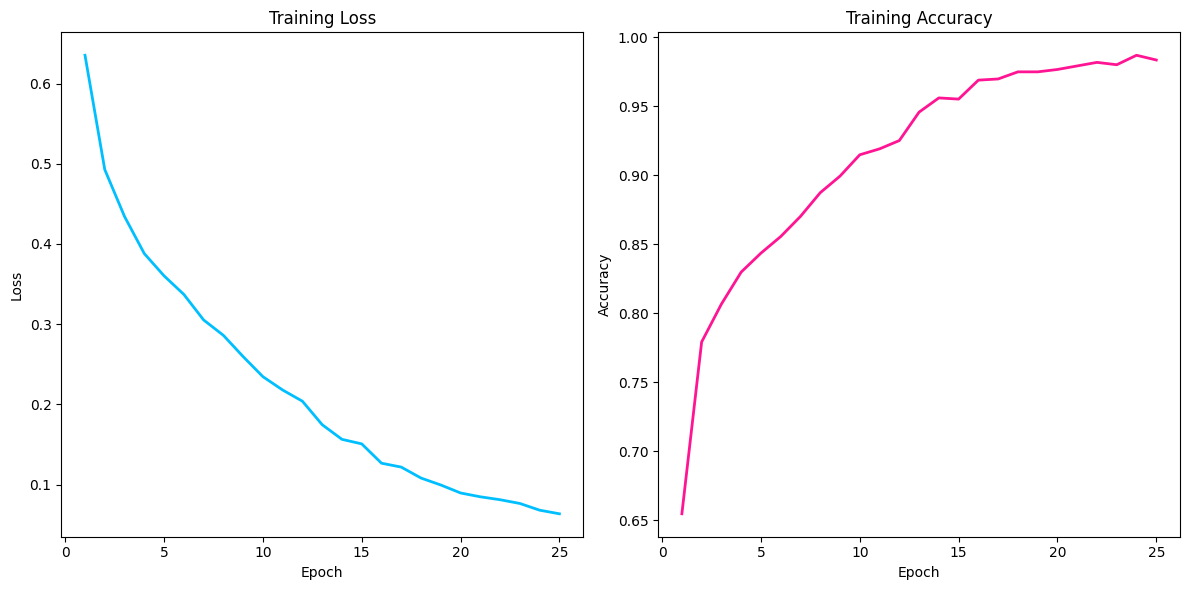

In [113]:
plot_training_summary(loss_vals_label_propagation, num_preds_label_propagation, cor_preds_label_propagation)

#### <a id='toc1_9_3_5_'></a>[Self-Training with Confidence Threshold](#toc0_)

##### <a id='toc1_9_3_5_1_'></a>[Random Forest](#toc0_)

In [114]:
text_classifier_self_training_random_forest = TextClassifier(INPUT_SIZE, HIDDEN_SIZE, OUTPUT_SIZE, DROPOUT_RATE)
text_classifier_self_training_random_forest.to(DEVICE)
texts_self_training_random_forest = train_df['text'].tolist() + unlabelled_df['text'].tolist()
labels_self_training_random_forest = np.concatenate([train_labels_raw, unlabelled_df['label_self_training_random_forest']])
embeddings_self_training_random_forest = np.concatenate([train_embeddings_raw, unlabelled_embeddings], axis=0)
train_loader_self_training_random_forest = DataLoader(TextDataset(texts_self_training_random_forest, labels_self_training_random_forest, torch.tensor(embeddings_self_training_random_forest, dtype=torch.float32)), batch_size=BATCH_SIZE, shuffle=True)
criterion_self_training_random_forest = nn.CrossEntropyLoss()
optimizer_self_training_random_forest = optim.Adam(text_classifier_self_training_random_forest.parameters(), lr=LEARNING_RATE)

loss_vals_self_training_random_forest, num_preds_self_training_random_forest, cor_preds_self_training_random_forest = train_text_classifier(text_classifier_self_training_random_forest, train_loader_self_training_random_forest, criterion_self_training_random_forest, optimizer_self_training_random_forest, NUM_EPOCHS)

Training: 100%|██████████| 25/25 [00:06<00:00,  3.76it/s]


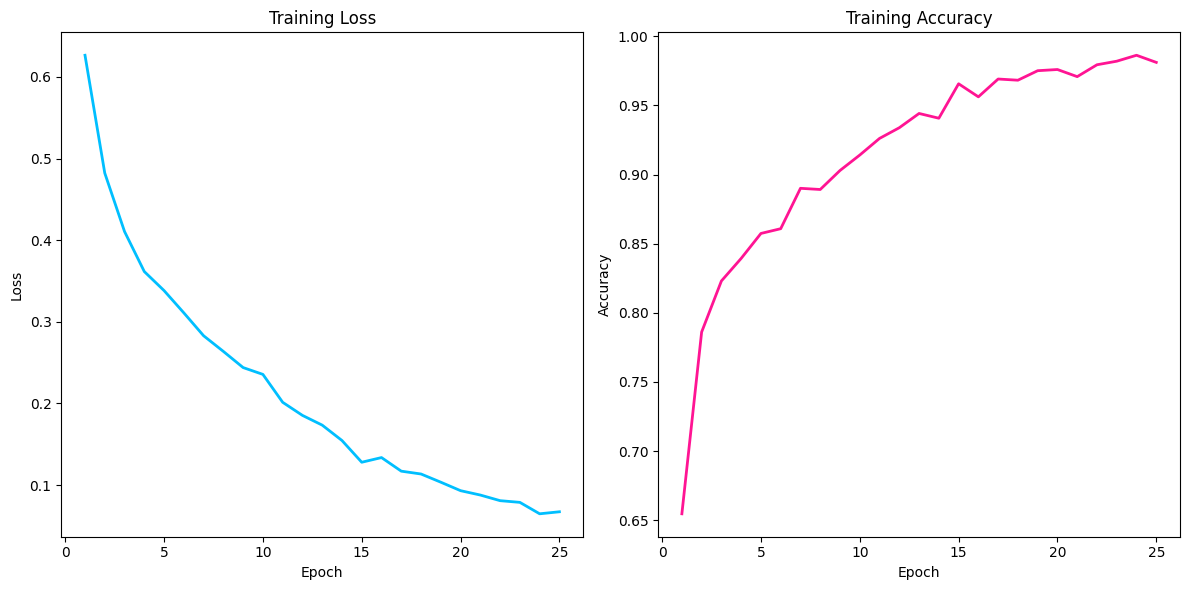

In [115]:
plot_training_summary(loss_vals_self_training_random_forest, num_preds_self_training_random_forest, cor_preds_self_training_random_forest)

##### <a id='toc1_9_3_5_2_'></a>[SVC](#toc0_)

In [116]:
text_classifier_self_training_svc = TextClassifier(INPUT_SIZE, HIDDEN_SIZE, OUTPUT_SIZE, DROPOUT_RATE)
text_classifier_self_training_svc.to(DEVICE)
texts_self_training_svc = train_df['text'].tolist() + unlabelled_df['text'].tolist()
labels_self_training_svc = np.concatenate([train_labels_raw, unlabelled_df['label_self_training_svc']])
embeddings_self_training_svc = np.concatenate([train_embeddings_raw, unlabelled_embeddings], axis=0)
train_loader_self_training_svc = DataLoader(TextDataset(texts_self_training_svc, labels_self_training_svc, torch.tensor(embeddings_self_training_svc, dtype=torch.float32)), batch_size=BATCH_SIZE, shuffle=True)
criterion_self_training_svc = nn.CrossEntropyLoss()
optimizer_self_training_svc = optim.Adam(text_classifier_self_training_svc.parameters(), lr=LEARNING_RATE)

loss_vals_self_training_svc, num_preds_self_training_svc, cor_preds_self_training_svc = train_text_classifier(text_classifier_self_training_svc, train_loader_self_training_svc, criterion_self_training_svc, optimizer_self_training_svc, NUM_EPOCHS)

Training: 100%|██████████| 25/25 [00:06<00:00,  4.03it/s]


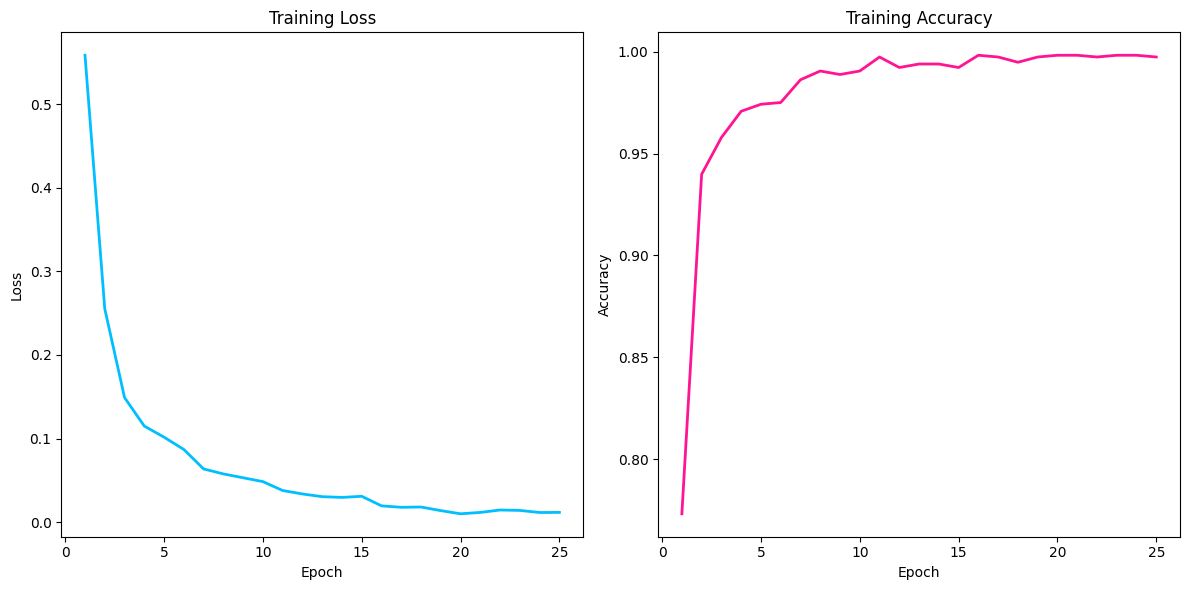

In [117]:
plot_training_summary(loss_vals_self_training_svc, num_preds_self_training_svc, cor_preds_self_training_svc)

#### <a id='toc1_9_3_6_'></a>[LLM](#toc0_)

In [108]:
text_classifier_llm = TextClassifier(INPUT_SIZE, HIDDEN_SIZE, OUTPUT_SIZE, DROPOUT_RATE)
text_classifier_llm.to(DEVICE)
texts_llm = train_df['text'].tolist() + unlabelled_df['text'].tolist()
labels_llm = np.concatenate([train_labels_raw, unlabelled_df['label_llm']])
embeddings_llm = np.concatenate([train_embeddings_raw, unlabelled_embeddings], axis=0)
train_loader_llm = DataLoader(TextDataset(texts_llm, labels_llm, torch.tensor(embeddings_llm, dtype=torch.float32)), batch_size=BATCH_SIZE, shuffle=True)
criterion_llm = nn.CrossEntropyLoss()
optimizer_llm = optim.Adam(text_classifier_llm.parameters(), lr=LEARNING_RATE)

loss_vals_llm, num_preds_llm, cor_preds_llm = train_text_classifier(text_classifier_llm, train_loader_llm, criterion_llm, optimizer_llm, NUM_EPOCHS)

Training: 100%|██████████| 25/25 [00:05<00:00,  4.29it/s]


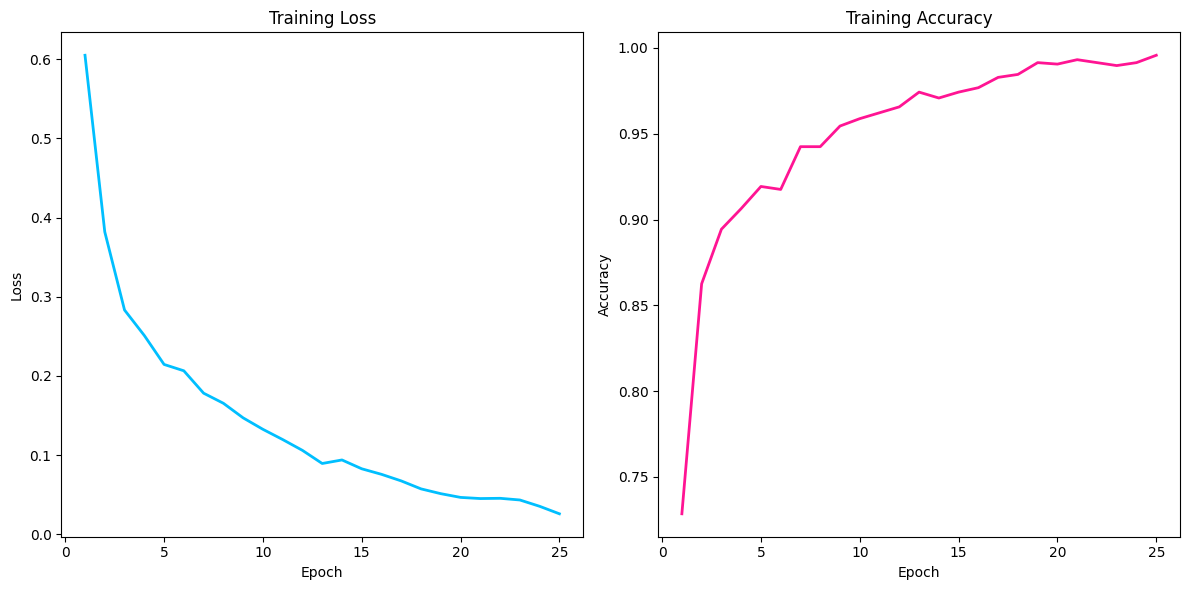

In [109]:
plot_training_summary(loss_vals_llm, num_preds_llm, cor_preds_llm)

## <a id='toc1_10_'></a>[Evaluation](#toc0_)

### <a id='toc1_10_1_'></a>[Random Forest](#toc0_)

#### <a id='toc1_10_1_1_'></a>[Raw Data](#toc0_)

In [118]:
random_forest_raw_accuracy = accuracy_score(test_labels, random_forest_raw_predictions)
random_forest_raw_classification_report = classification_report(test_labels, random_forest_raw_predictions)

In [119]:
print(f'Random Forest Raw Accuracy: {random_forest_raw_accuracy}')
print('Random Forest Raw Classification Report:')
print(random_forest_raw_classification_report)

Random Forest Raw Accuracy: 0.6933333333333334
Random Forest Raw Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.56      0.66        78
           1       0.64      0.83      0.72        72

    accuracy                           0.69       150
   macro avg       0.71      0.70      0.69       150
weighted avg       0.71      0.69      0.69       150



#### <a id='toc1_10_1_2_'></a>[KMeans](#toc0_)

In [120]:
random_forest_kmeans_accuracy = accuracy_score(test_labels, random_forest_kmeans_predictions)
random_forest_kmeans_classification_report = classification_report(test_labels, random_forest_kmeans_predictions)

In [121]:
print(f'Random Forest KMeans Accuracy: {random_forest_kmeans_accuracy}')
print('Random Forest KMeans Classification Report:')
print(random_forest_kmeans_classification_report)

Random Forest KMeans Accuracy: 0.5133333333333333
Random Forest KMeans Classification Report:
              precision    recall  f1-score   support

           0       0.54      0.41      0.47        78
           1       0.49      0.62      0.55        72

    accuracy                           0.51       150
   macro avg       0.52      0.52      0.51       150
weighted avg       0.52      0.51      0.51       150



#### <a id='toc1_10_1_3_'></a>[KNN](#toc0_)

In [122]:
random_forest_knn_accuracy = accuracy_score(test_labels, random_forest_knn_predictions)
random_forest_knn_classification_report = classification_report(test_labels, random_forest_knn_predictions)

In [123]:
print(f'Random Forest KNN Accuracy: {random_forest_knn_accuracy}')
print('Random Forest KNN Classification Report:')
print(random_forest_knn_classification_report)

Random Forest KNN Accuracy: 0.66
Random Forest KNN Classification Report:
              precision    recall  f1-score   support

           0       0.65      0.76      0.70        78
           1       0.68      0.56      0.61        72

    accuracy                           0.66       150
   macro avg       0.66      0.66      0.65       150
weighted avg       0.66      0.66      0.66       150



#### <a id='toc1_10_1_4_'></a>[Graph-based](#toc0_)

In [124]:
random_forest_label_propagation_accuracy = accuracy_score(test_labels, random_forest_label_propagation_predictions)
random_forest_label_propagation_classification_report = classification_report(test_labels, random_forest_label_propagation_predictions)

In [125]:
print(f'Random Forest Label Propagation Accuracy: {random_forest_label_propagation_accuracy}')
print('Random Forest Label Propagation Classification Report:')
print(random_forest_label_propagation_classification_report)

Random Forest Label Propagation Accuracy: 0.6933333333333334
Random Forest Label Propagation Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.77      0.72        78
           1       0.71      0.61      0.66        72

    accuracy                           0.69       150
   macro avg       0.70      0.69      0.69       150
weighted avg       0.70      0.69      0.69       150



#### <a id='toc1_10_1_5_'></a>[Self-Training with Confidence Threshold](#toc0_)

##### <a id='toc1_10_1_5_1_'></a>[Random Forest](#toc0_)

In [126]:
random_forest_self_training_random_forest_accuracy = accuracy_score(test_labels, random_forest_self_training_random_forest_predictions)
random_forest_self_training_random_forest_classification_report = classification_report(test_labels, random_forest_self_training_random_forest_predictions)

In [127]:
print(f'Random Forest Self Training Random Forest Accuracy: {random_forest_self_training_random_forest_accuracy}')
print('Random Forest Self Training Random Forest Classification Report:')
print(random_forest_self_training_random_forest_classification_report)

Random Forest Self Training Random Forest Accuracy: 0.62
Random Forest Self Training Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.41      0.53        78
           1       0.57      0.85      0.68        72

    accuracy                           0.62       150
   macro avg       0.66      0.63      0.61       150
weighted avg       0.66      0.62      0.60       150



##### <a id='toc1_10_1_5_2_'></a>[SVC](#toc0_)

In [128]:
random_forest_self_training_svc_accuracy = accuracy_score(test_labels, random_forest_self_training_svc_predictions)
random_forest_self_training_svc_classification_report = classification_report(test_labels, random_forest_self_training_svc_predictions)

In [129]:
print(f'Random Forest Self Training SVC Accuracy: {random_forest_self_training_svc_accuracy}')
print('Random Forest Self Training SVC Classification Report:')
print(random_forest_self_training_svc_classification_report)

Random Forest Self Training SVC Accuracy: 0.7
Random Forest Self Training SVC Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.63      0.69        78
           1       0.66      0.78      0.71        72

    accuracy                           0.70       150
   macro avg       0.71      0.70      0.70       150
weighted avg       0.71      0.70      0.70       150



#### <a id='toc1_10_1_6_'></a>[LLM](#toc0_)

In [130]:
random_forest_llm_accuracy = accuracy_score(test_labels, random_forest_llm_predictions)
random_forest_llm_classification_report = classification_report(test_labels, random_forest_llm_predictions)

In [132]:
print(f'Random Forest LLM Accuracy: {random_forest_llm_accuracy}')
print('Random Forest LLM Classification Report:')
print(random_forest_llm_classification_report)

Random Forest LLM Accuracy: 0.7466666666666667
Random Forest LLM Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.83      0.77        78
           1       0.78      0.65      0.71        72

    accuracy                           0.75       150
   macro avg       0.75      0.74      0.74       150
weighted avg       0.75      0.75      0.74       150



### <a id='toc1_10_2_'></a>[Neural Network](#toc0_)

In [134]:
def evaluate_text_classifier(model, test_loader):
    model.eval()

    correct_preds = 0
    total_preds = 0

    with torch.no_grad():
        for texts, labels, embeddings in test_loader:
            labels = labels.to(DEVICE)
            embeddings = embeddings.to(DEVICE)

            outputs = model(embeddings)
            predictions = torch.argmax(outputs, dim=1)

            correct_preds += torch.sum(predictions == labels).item()
            total_preds += len(labels)

    return correct_preds, total_preds

In [135]:
def plot_confusion_matrix(labels, preds, classes):
    cm = confusion_matrix(labels, preds)
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.figure(figsize=(12, 6))
    sns.heatmap(cm, annot=True, fmt='.2f', cmap='coolwarm', xticklabels=classes, yticklabels=classes)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title('Confusion Matrix')
    plt.show()

In [136]:
BATCH_SIZE = 8

In [137]:
test_loader = DataLoader(TextDataset(test_df['text'], test_df['label'], torch.tensor(test_embeddings, dtype=torch.float32)), batch_size=BATCH_SIZE, shuffle=False)

#### <a id='toc1_10_2_1_'></a>[Raw Data](#toc0_)

In [138]:
correct_preds_raw, total_preds_raw = evaluate_text_classifier(text_classifier_raw, test_loader)

print(f'Accuracy: {(correct_preds_raw / total_preds_raw)*100:.2f}%')
print(f'Number of correct predictions: {correct_preds_raw}/{total_preds_raw}')

Accuracy: 78.67%
Number of correct predictions: 118/150


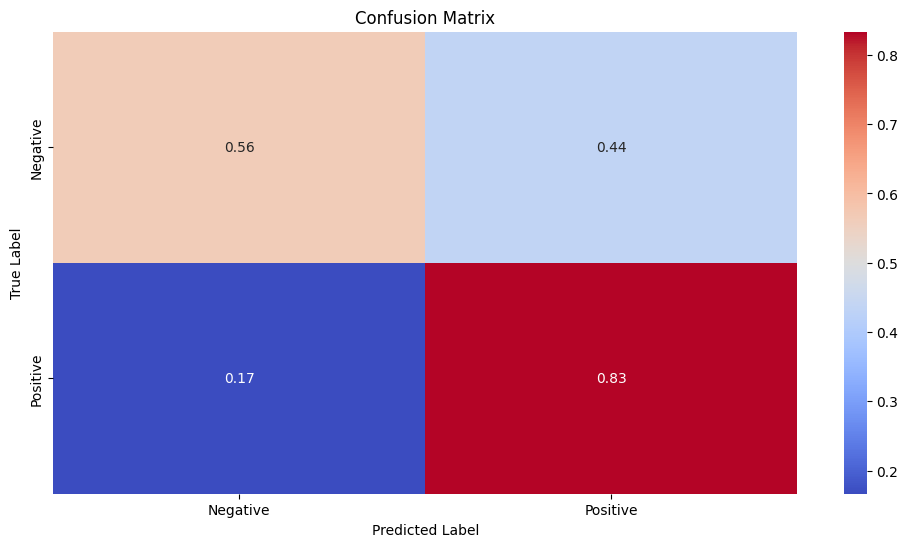

In [139]:
plot_confusion_matrix(test_labels, random_forest_raw_predictions, ['Negative', 'Positive'])

#### <a id='toc1_10_2_2_'></a>[KMeans](#toc0_)

In [140]:
correct_preds_kmeans, total_preds_kmeans = evaluate_text_classifier(text_classifier_kmeans, test_loader)

print(f'Accuracy: {(correct_preds_kmeans / total_preds_kmeans)*100:.2f}%')
print(f'Number of correct predictions: {correct_preds_kmeans}/{total_preds_kmeans}')

Accuracy: 56.67%
Number of correct predictions: 85/150


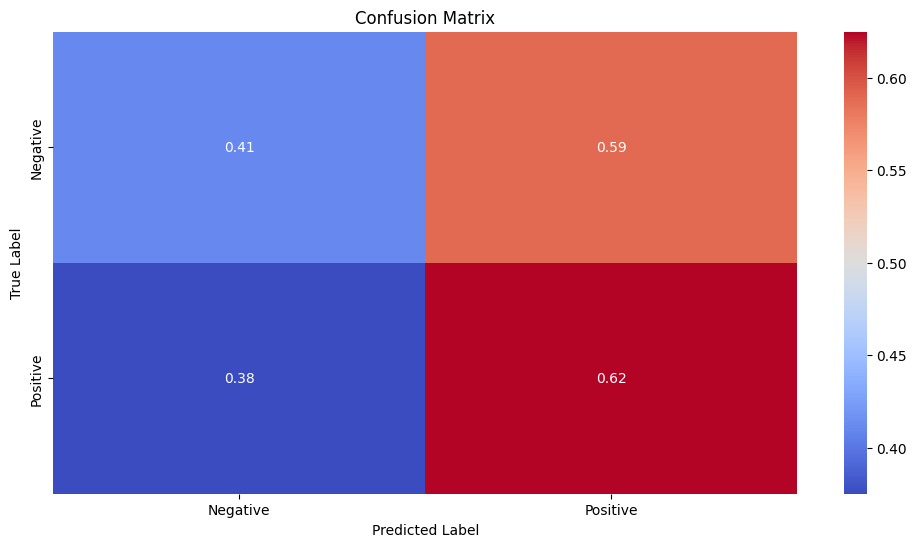

In [141]:
plot_confusion_matrix(test_labels, random_forest_kmeans_predictions, ['Negative', 'Positive'])

#### <a id='toc1_10_2_3_'></a>[KNN](#toc0_)

In [142]:
correct_preds_knn, total_preds_knn = evaluate_text_classifier(text_classifier_knn, test_loader)

print(f'Accuracy: {(correct_preds_knn / total_preds_knn)*100:.2f}%')
print(f'Number of correct predictions: {correct_preds_knn}/{total_preds_knn}')

Accuracy: 68.00%
Number of correct predictions: 102/150


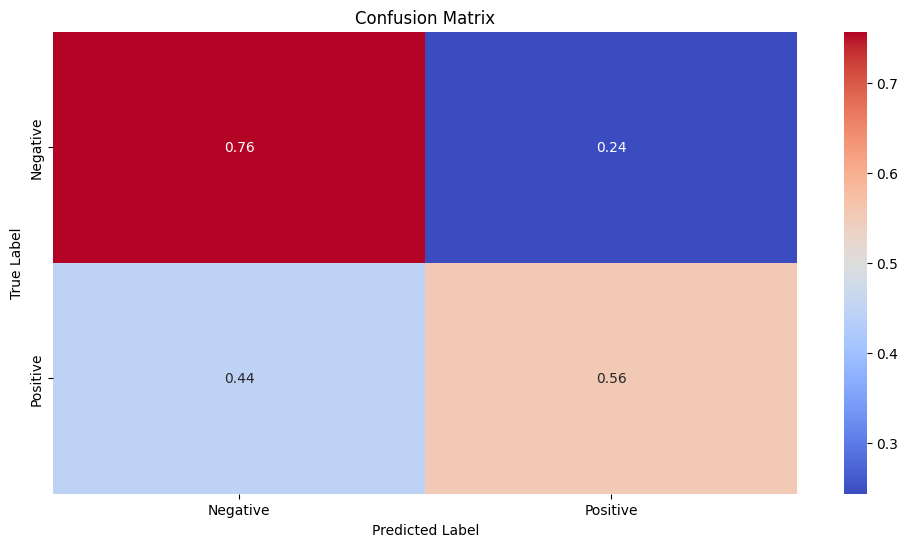

In [143]:
plot_confusion_matrix(test_labels, random_forest_knn_predictions, ['Negative', 'Positive'])

#### <a id='toc1_10_2_4_'></a>[Graph-based](#toc0_)

In [144]:
correct_preds_label_propagation, total_preds_label_propagation = evaluate_text_classifier(text_classifier_label_propagation, test_loader)

print(f'Accuracy: {(correct_preds_label_propagation / total_preds_label_propagation)*100:.2f}%')
print(f'Number of correct predictions: {correct_preds_label_propagation}/{total_preds_label_propagation}')

Accuracy: 75.33%
Number of correct predictions: 113/150


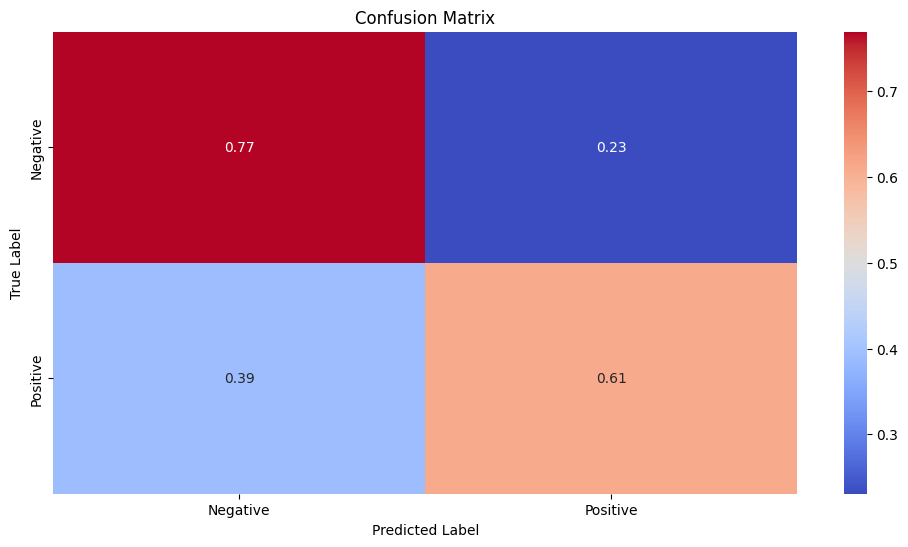

In [145]:
plot_confusion_matrix(test_labels, random_forest_label_propagation_predictions, ['Negative', 'Positive'])

#### <a id='toc1_10_2_5_'></a>[Self-Training with Confidence Threshold](#toc0_)

##### <a id='toc1_10_2_5_1_'></a>[Random Forest](#toc0_)

In [146]:
correct_preds_self_training_random_forest, total_preds_self_training_random_forest = evaluate_text_classifier(text_classifier_self_training_random_forest, test_loader)

print(f'Accuracy: {(correct_preds_self_training_random_forest / total_preds_self_training_random_forest)*100:.2f}%')
print(f'Number of correct predictions: {correct_preds_self_training_random_forest}/{total_preds_self_training_random_forest}')

Accuracy: 76.67%
Number of correct predictions: 115/150


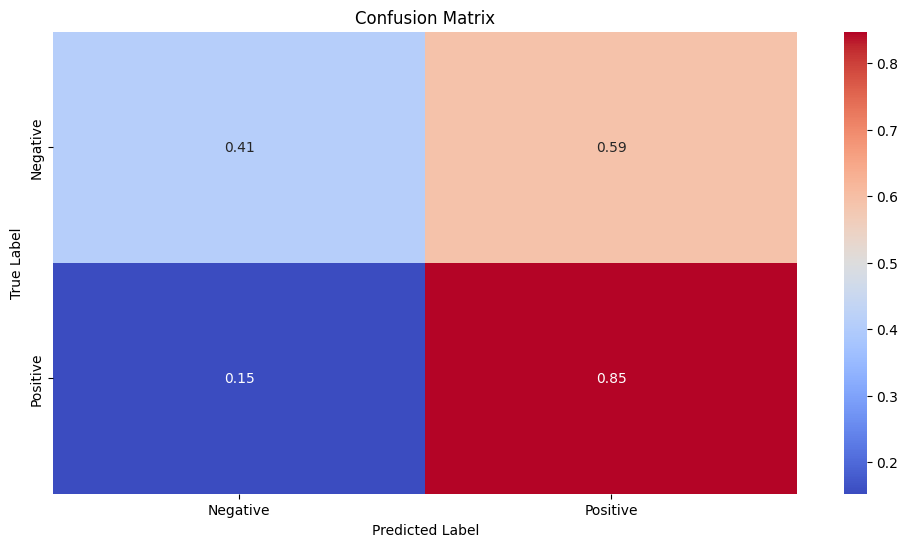

In [147]:
plot_confusion_matrix(test_labels, random_forest_self_training_random_forest_predictions, ['Negative', 'Positive'])

##### <a id='toc1_10_2_5_2_'></a>[SVC](#toc0_)

In [148]:
correct_preds_self_training_svc, total_preds_self_training_svc = evaluate_text_classifier(text_classifier_self_training_svc, test_loader)

print(f'Accuracy: {(correct_preds_self_training_svc / total_preds_self_training_svc)*100:.2f}%')
print(f'Number of correct predictions: {correct_preds_self_training_svc}/{total_preds_self_training_svc}')

Accuracy: 77.33%
Number of correct predictions: 116/150


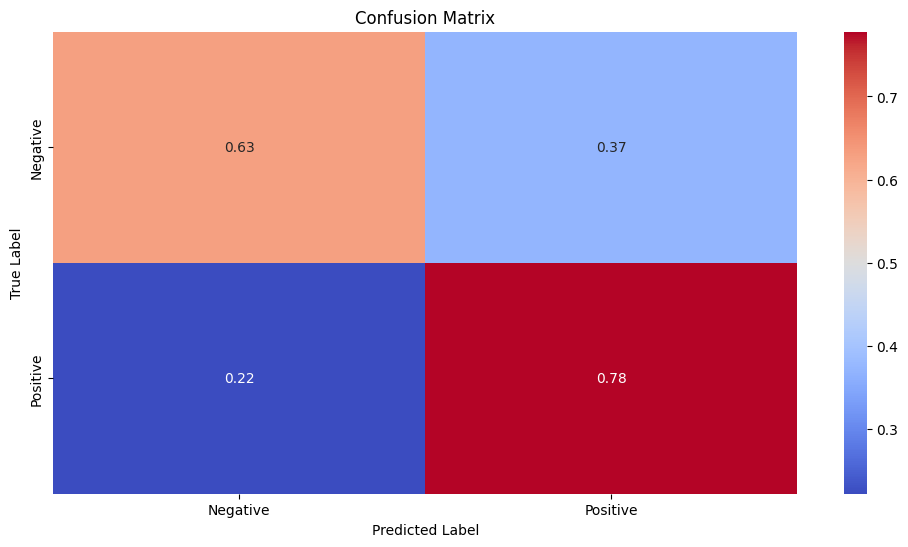

In [149]:
plot_confusion_matrix(test_labels, random_forest_self_training_svc_predictions, ['Negative', 'Positive'])

#### <a id='toc1_10_2_6_'></a>[LLM](#toc0_)

In [150]:
correct_preds_llm, total_preds_llm = evaluate_text_classifier(text_classifier_llm, test_loader)

print(f'Accuracy: {(correct_preds_llm / total_preds_llm)*100:.2f}%')
print(f'Number of correct predictions: {correct_preds_llm}/{total_preds_llm}')

Accuracy: 82.67%
Number of correct predictions: 124/150


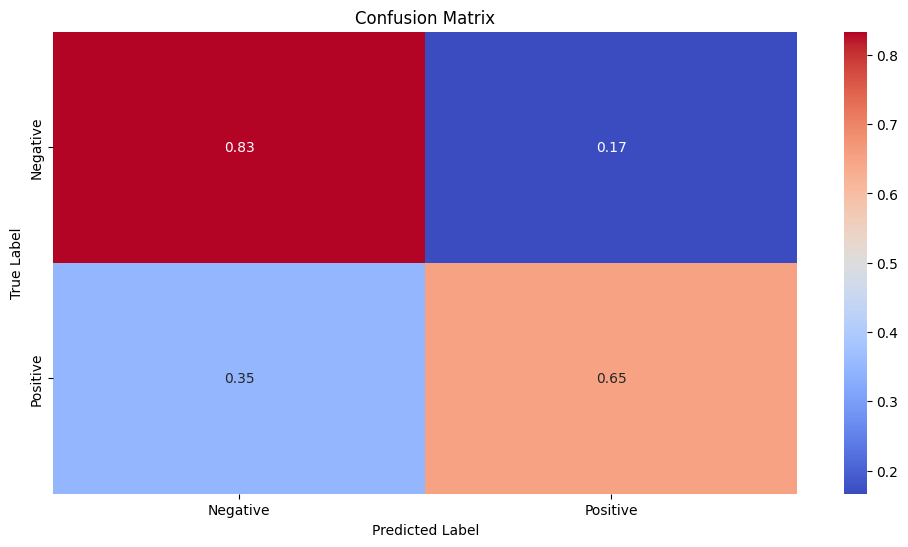

In [151]:
plot_confusion_matrix(test_labels, random_forest_llm_predictions, ['Negative', 'Positive'])

## <a id='toc1_11_'></a>[Questions](#toc0_)

### <a id='toc1_11_1_'></a>[Question 1](#toc0_)

**Research semi-supervised problems and explain how to select a proportion of data for manual labeling. Does the choice of data matter?**



Semi-supervised learning (SSL) is a type of machine learning that combines a small amount of labeled data with a large amount of unlabeled data during training. It is used when acquiring labeled data is expensive or time-consuming, but unlabeled data is plentiful and inexpensive to collect.

**Steps to Select Data for Manual Labeling:**
- Step 1: Initial Labeling: Randomly select a small portion (e.g., 5-10%) of the data to label. This initial set serves as a starting point for training the first model.

- Step 2: Train Initial Model: Train the model using the initial labeled data. Evaluate its performance on a validation set.

- Step 3: Active Learning (Optional): Use the trained model to make predictions on the unlabeled data. Identify samples where the model has high uncertainty (e.g., prediction probabilities close to 0.5 in a binary classification).
Select a new batch of these uncertain samples for manual labeling.

- Step 4: Stratified Sampling (Optional): Ensure that the newly selected samples cover all classes or clusters in the data to avoid bias.
If certain classes are underrepresented, focus on labeling more examples from those classes.

- Step 5: Iteration: Repeat the training and active learning steps iteratively, gradually increasing the proportion of labeled data until the model reaches satisfactory performance or the labeling budget is exhausted.

The choice of data matters and important to notice. We need to label diverse amount of data in order to prevent ourselvers from training a biased model.

### <a id='toc1_11_2_'></a>[Question 2](#toc0_)

**For label propagation, how many data points did you label using your manually labeled data? Explain the trade-off between quality and quantity of your labeled data.**

For label propagation, I labeled all the unlabeled data points using the mentioned semi-supervised learning techniques (K-Means, K-Nearest Neighbors, Graph-Based Label Propagation, and Self-Training with a confidence threshold of 0.9). So, effectively, the number of data points labeled would be equal to the number of unlabeled data points in the dataset. We also used phi-3 model to label the data. By using this LLM, we could ignore the generated labels if they were not confident enough or if they were not valid.

**trade-off between quality and quantity of our labeled data**

there is a trade-off between the quality and quantity of labeled data. In general, having more labeled data can improve the performance of the model, as it provides more information for the model to learn from. However, labeling data can be time-consuming and expensive, so there is a trade-off between the amount of data labeled and the resources required to label it. In some cases, it may be more beneficial to label a smaller amount of high-quality data rather than a larger amount of lower-quality data. It is important to consider the cost and benefits of labeling data when deciding how much data to label. In the context of semi-supervised learning, the goal is to leverage the unlabeled data to improve the performance of the model, so it is important to strike a balance between the amount of labeled and unlabeled data used in training. 

For example, by using K-Means clustering, high quantity of data can lead to noisy labels if the clusters are not well-separated. By using K-Nearest Neighbors, the quality of the labels depends on the choice of the number of neighbors. High quantity of data can lead to lower quality labels if the local neighborhoods are not representative of the true labels. In graph-based label propagation, the performance of the model depends on the quality of the graph construction and the choice of the propagation method. High quantity of data can lead to lower quality labels if the graph is not well-constructed. In self-training, the quality of the labels depends on the confidence threshold used to accept the predicted labels. High quantity of data can lead to lower quality labels if the confidence threshold is too low and noisy labels are accepted.

### <a id='toc1_11_3_'></a>[Question 3](#toc0_)

**Research the limitations of label propagation methods. Can these limitations be overcome using a large language model (LLM)? If yes, explain how and why using LLMs is more effective for these tasks.**

**Limitations of Label Propagation Methods**

 1. Scalability:
 - Computational Complexity: Label propagation requires constructing and processing an affinity matrix, which can be computationally expensive and memory-intensive for large datasets. The complexity increases quadratically with the number of data points.
 - Graph Construction Overhead: Building a high-quality similarity graph is computationally intensive and can be infeasible for very large datasets.

 2. Sensitivity to Graph Structure:

 - Quality of the Graph: The performance heavily depends on the quality of the graph, which is influenced by the choice of similarity measures and the method used to construct the graph.

  - Disconnected Components: If the graph has disconnected components, labels cannot propagate between these components, leading to suboptimal classification.
  
  3. Parameter Sensitivity:
   
  - Hyperparameter Tuning: The algorithm's performance can be sensitive to the choice of hyperparameters such as the number of neighbors in the graph, the propagation coefficient, and others.
  
  - Balance Between Labeled and Unlabeled Data: Finding the right balance in the influence of labeled versus unlabeled data can be challenging.
  
  4. Bias and Overfitting:
  
  - Bias Propagation: If the initial labeled data is biased, this bias can be propagated through the unlabeled data, leading to skewed results.

  - Overfitting to Graph Structure: The model may overfit to the specific structure of the graph used during training.

**Can These Limitations Be Overcome Using a Large Language Model (LLM)?**

  Yes, many of these limitations can be addressed using large language models (LLMs) such as GPT-3, GPT-4, BERT, etc. Here’s how and why LLMs can be more effective due to their scalability, less parameter sensitivity, bias mitigation, and interopertability.


### <a id='toc1_11_4_'></a>[Question 4](#toc0_)

**Research the history of language modeling, their evolution, and explain how they work. Discuss the advantages and limitations of language models, especially large language models (LLMs), in various tasks.**

#### <a id='toc1_11_4_1_'></a>[History and Evolution of Language Modeling](#toc0_)

**Early Beginnings: N-gram Models**
 Language modeling began with simple statistical methods, primarily n-gram models, which predict the probability of a word based on the previous 𝑛 − 1 n−1 words.
- N-gram Models: An n-gram model is a probabilistic language model that predicts the next item in a sequence based on the previous 𝑛 − 1 n−1 items. - Unigram: Considers each word independently.
- Bigram: Considers the probability of a word given the previous word. - Trigram: Considers the probability of a word given the previous two words. - Limitations: These models suffer from the curse of dimensionality, sparsity of data, and lack of understanding of long-range dependencies.

**Introduction of Neural Networks**

 The limitations of n-gram models led to the exploration of neural networks for language modeling.
 - Feedforward Neural Networks: Early models used feedforward neural networks to predict the next word in a sequence, introducing the concept of word embeddings to represent words in a continuous vector space.
- Recurrent Neural Networks (RNNs): RNNs, particularly Long Short-Term Memory (LSTM) networks, addressed the problem of capturing long-term dependencies in text.
- LSTM: Introduced by Hochreiter and Schmidhuber in 1997, LSTMs can capture dependencies across long sequences by using gates to control the flow of information.

**The Transformer Model**

 The transformer model, introduced by Vaswani et al. in 2017, revolutionized language modeling by replacing recurrent connections with self-attention mechanisms.

- Attention Mechanism: Allows the model to weigh the importance of different words in a sequence, enabling parallelization and better handling of long-range dependencies.

- BERT (Bidirectional Encoder Representations from Transformers): Introduced by Google in 2018, BERT uses a transformer-based architecture to pre-train a model on a large corpus in a bidirectional manner.

- GPT (Generative Pre-trained Transformer): OpenAI's GPT models, starting with GPT in 2018, focused on unsupervised pre-training followed by supervised fine-tuning for specific tasks. GPT-2 and GPT-3 followed, significantly increasing model size and capabilities.

#### <a id='toc1_11_4_2_'></a>[How Language Models Work?](#toc0_)

##### <a id='toc1_11_4_2_1_'></a>[Basic Mechanism:](#toc0_)

Language models work by learning the probability distribution of sequences of words. They are trained to predict the next word in a sequence given the previous words.
- Training Data: Large corpora of text are used to train language models. The model learns patterns, grammar, and contextual relationships from this data.

- Tokenization: Text is split into smaller units called tokens. Models can operate on word-level, subword-level, or character-level tokens.

- Embedding: Tokens are converted into continuous vector representations (embeddings) that capture semantic meaning.

- Contextualization: Models like transformers use layers of attention mechanisms to capture the relationships between tokens in a sequence.

- Prediction: The final layer of the model produces a probability distribution over the vocabulary, predicting the most likely next token.

##### <a id='toc1_11_4_2_2_'></a>[Advantages of Large Language Models:](#toc0_)

 1. High-Quality Text Generation:
  
  - Coherent and Contextual Responses: LLMs can generate highly coherent and contextually relevant text, making them useful for applications like chatbots, content creation, and creative writing.
  - Versatility: They can handle a wide range of topics and tasks without needing task-specific training, making them highly versatile.
  
  2. Understanding and Processing Natural Language:  

  - Semantic Understanding: LLMs have a good grasp of semantics, allowing them to provide meaningful interpretations of input text, which is beneficial for tasks like summarization, translation, and question-answering.
   
  - Contextual Awareness: They can maintain context over long conversations or documents, improving user experience in conversational agents and dialogue systems.
  
 3. Automation of Routine Tasks:
  
  - Efficiency: LLMs can automate routine text-based tasks like drafting emails, generating reports, and more, saving time and reducing human effort.
  
  - Scalability: They can scale to handle large volumes of data, making them suitable for enterprise applications.
   
##### <a id='toc1_11_4_2_3_'></a>[Disadvantages of Large Language Models:](#toc0_)
  
  1. Resource Intensive:
   
   - High Computational Cost: Training and running LLMs require significant computational resources, making them expensive to develop and deploy.
   
   - Energy Consumption: The energy consumption associated with LLMs is substantial, raising concerns about their environmental impact.
   
  2. Data Sensitivity:
  - Bias and Fairness: LLMs can inherit biases present in the training data, leading to biased or unfair outputs.
  - Ethical Concerns: There are ethical concerns related to the generation of harmful content misinformation, or offensive language.
  
  3. Interpretability and Transparency:

  - Black Box Nature: LLMs are often seen as black boxes, making it difficult to interpret their decision-making processes.
  - Lack of Explainability: This lack of transparency can be problematic in applications requiring accountability and explainability, such as legal or medical fields.

  4. Generalization and Specificity:

  - Overgeneralization: LLMs might overgeneralize and provide plausible-sounding but incorrect or nonsensical answers, especially in domains requiring specialized knowledge.
  
  - Lack of Domain Expertise: They may struggle with tasks requiring deep domain-specific expertise unless specifically fine-tuned with domain-specific data.


### <a id='toc1_11_5_'></a>[Question 5](#toc0_)

**For each method (LLM/Label-Propagation), explain its advantages and disadvantages.**

Overall, label propagation methods are simple, scalable, flexible, and effective for semi-supervised learning tasks. On the other hand, they are Sensitive to parameters, computationally intensive (KNN), their quality depends on clustering/graph structure, and they have risk of error propagation (self-training).

LLMs like GPT-4 are highly accurate, leverage pre-trained knowledge, can perform well with few labeled examples, and require less manual feature engineering. However, they are computationally intensive, raise data privacy concerns, depend on pre-training data, and are considered black boxes.

#### <a id='toc1_11_5_1_'></a>[Label Propagation Methods:](#toc0_)

##### <a id='toc1_11_5_1_1_'></a>[KMeans Clustering](#toc0_)

**Advantages:**

Simplicity: Easy to implement and understand.
Scalability: Scales well with the size of the dataset.
No Need for Labeled Data: Can work without any initial labeled data, making it useful for fully unsupervised settings.

**Disadvantages:**

Quality of Clustering: The quality of the labels depends heavily on the quality of the clustering. Poor clustering can lead to noisy labels.
Cluster Assumptions: Assumes that data points form well-separated clusters, which may not always be true.
Hyperparameter Sensitivity: The number of clusters (k) needs to be chosen carefully, which can be non-trivial.

##### <a id='toc1_11_5_1_2_'></a>[KNN (K-Nearest Neighbors)](#toc0_)

**Advantages:**

Intuitive: Easy to understand and implement.
Flexible: Can work well with different types of data and metrics.

**Disadvantages:**

Computationally Intensive: Especially for large datasets, as it requires calculating the distance to all other points.
Sensitivity to Noise: Sensitive to noisy and irrelevant features.
Choice of k: The choice of the number of neighbors (k) can significantly affect performance.

##### <a id='toc1_11_5_1_3_'></a>[Graph-Based Label Propagation](#toc0_)

**Advantages:**

Effective for Semi-Supervised Learning: Utilizes the structure of the data to propagate labels effectively.
Handles Complex Relationships: Can capture complex relationships between data points.

**Disadvantages:**

Graph Construction: Building the graph can be computationally intensive and tricky.
Scalability: May not scale well to very large datasets.
Parameter Sensitivity: Performance can be sensitive to the choice of parameters like similarity metrics.

##### <a id='toc1_11_5_1_4_'></a>[Self-Training](#toc0_)

**Advantages:**

Iterative Improvement: Can iteratively improve the quality of labeled data by refining the model.
Flexibility: Can be used with any classifier.

**Disadvantages:**

Initial Model Quality: Relies heavily on the quality of the initial model.
Confidence Threshold: Setting the confidence threshold can be challenging and affects the trade-off between quality and quantity of labeled data.
Risk of Error Propagation: Incorrect labels in early iterations can propagate and degrade performance.

#### <a id='toc1_11_5_2_'></a>[Using Large Language Models (LLMs) like GPT-4](#toc0_)

**Advantages:**

High Accuracy: LLMs trained on vast amounts of text data can provide highly accurate and contextually appropriate labels.
Pre-trained Knowledge: Benefit from extensive pre-training on diverse datasets, which allows them to understand complex language patterns and nuances.
Few-Shot Learning: Can perform well even with few labeled examples due to their ability to generalize from small amounts of data.
Ease of Use: Requires less manual feature engineering compared to traditional methods.

**Disadvantages**:

Computational Resources: Requires significant computational power and memory for inference, which can be costly.
Data Privacy: Using third-party LLMs might raise data privacy concerns, especially with sensitive data.
Dependence on Pre-training Data: Performance is dependent on the quality and scope of the data on which the LLM was pre-trained.
Black Box Nature: LLMs are often considered black boxes, making it difficult to understand how decisions are made.



### <a id='toc1_11_6_'></a>[Question 6](#toc0_)

**Certainly, you have worked with large language models (LLMs) since they were made public, and you might even be using one right now to help you with your assignment! How has your experience been while interacting with one of them? How do other LLMs differ from each other? Name some of these LLMs that you have worked with and share your opinion about them.**

Personally, I used to work with GPT 3.5, which works well in terms of providing high-level information, and also ordinary task. However, when it comes to detail, it provides some mistake information and answers, and due to its unexplainability, there is no way to evaluate its answers by prompting iteself. 

From 2 weeks ago, I've started to use GTP 4o, which has much enhancements compared to GPT 3.5. It can generate pictures, voice, and works much faster than GPT 3.5. However, it still has the problem of unexplainability and lack of powerness when it comes to detail.

In addition, we used Phi-3 model released by Microsoft, which works well in this project. Also, there are several other famous LLMs like BERT, Claude, Cohere, Ernie, Falcon 40B, and Google Gemini.